<a href="https://colab.research.google.com/github/ImronRosada/Data_Science/blob/main/Feature_Importance_Analysis_%26_Model_Interpretation_ImronRosada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMRON ROSADA<BR>
DATA SCIENCE<BR>
FEATURE IMPORTANCE ANALYSIS & MODEL INTERPRETATION<br>
[Link GitHub Notebook](https://github.com/ImronRosada/Data_Science/blob/main/Feature_Importance_Analysis_%26_Model_Interpretation_ImronRosada.ipynb)


## `DATA UNDERSTANDING`

Mengeksplorasi data untuk mendapatkan wawasan awal serta memastikan kualitas data.

Memprediksi apakah pelanggan akan berhenti menggunakan layanan (**Churn**) di sebuah platform pinjaman online berdasarkan berbagai variabel yang mempengaruhi keputusan pelanggan dalam melakukan pembayaran online. Model yang digunakan harus transparan dan mampu memberikan insight yang jelas mengenai faktor-faktor yang berkontribusi terhadap churn.

**Deskripsi Variabel**  

Dataset memiliki **10.127** entri dan **21** kolom, termasuk:  

| **Nama Kolom**                 | **Deskripsi** |
|--------------------------------|--------------|
| **user_id**                    | Nomor akun pelanggan |
| **attrition_flag**              | Status pelanggan (Existing = Aktif, Attrited = Berhenti) (`variabel target`) |
| **customer_age**                | Usia pelanggan |
| **gender**                      | Jenis kelamin pelanggan (M = Laki-laki, F = Perempuan) |
| **dependent_count**             | Jumlah tanggungan pelanggan |
| **education_level**             | Tingkat pendidikan pelanggan |
| **marital_status**              | Status pernikahan pelanggan  |
| **income_category**             | Kategori pendapatan pelanggan  |
| **card_category**               | Jenis kartu yang digunakan pelanggan |
| **months_on_book**              | Lama menjadi pelanggan (dalam bulan) |
| **total_relationship_count**    | Jumlah produk yang digunakan pelanggan di bank |
| **months_inactive_12_mon**      | Lama tidak aktif dalam 12 bulan terakhir |
| **contacts_count_12_mon**       | Jumlah interaksi antara pelanggan dan bank dalam 12 bulan terakhir |
| **credit_limit**                | Batas nominal transaksi kartu kredit dalam satu periode |
| **total_revolving_bal**         | Total dana yang digunakan dalam satu periode |
| **avg_open_to_buy**             | Selisih antara batas kredit yang diberikan dan saldo saat ini |
| **total_amt_chng_q4_q1**        | Perubahan nominal transaksi pelanggan antara kuartal 4 dan kuartal 1 |
| **total_trans_amt**             | Total nominal transaksi dalam 12 bulan terakhir |
| **total_trans_ct**              | Jumlah transaksi dalam 12 bulan terakhir |
| **total_ct_chng_q4_q1**         | Perubahan jumlah transaksi pelanggan antara kuartal 4 dan kuartal 1 |
| **avg_utilization_ratio**       | Persentase penggunaan kartu kredit |

Variabel **attrition_flag** merupakan target yang akan diprediksi.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Load dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

# where is your data path
data_path = '/content/drive/My Drive/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
pd.set_option('display.max_columns', None)
file_name = data_path + 'bank_churn_data.csv'

In [ ]:
df = pd.read_csv(file_name)
df_churn = df.copy()
df_churn.head()

,user_id,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## `DATA PREPARATION`

Langkah-langkah yang dilakukan untuk memastikan data siap digunakan dalam analisis atau pembuatan model.

In [ ]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

- user_id →  Identifikasi unik, bukan data yang digunakan untuk analisis pembuatan model. Bisa diabaikan atau dihapus jika tidak diperlukan.<br>
- attrition_flag → Seharusnya category (karena ini adalah variabel target dengan dua kategori: "Existing" dan "Attrited").
- gender → Seharusnya category (karena hanya memiliki dua nilai unik: "M" dan "F").
- education_level → Seharusnya category (karena ini adalah data kategori dengan beberapa tingkat pendidikan).
- marital_status → Seharusnya category (karena ini adalah data kategori dengan beberapa status).
- income_category → Seharusnya category (karena ini adalah kategori pendapatan, bukan angka untuk perhitungan).
- card_category → Seharusnya category (karena hanya memiliki beberapa jenis kartu).

In [ ]:
df_churn["attrition_flag"] = df_churn["attrition_flag"].astype("category")
df_churn["gender"] = df_churn["gender"].astype("category")
df_churn["education_level"] = df_churn["education_level"].astype("category")
df_churn["marital_status"] = df_churn["marital_status"].astype("category")
df_churn["income_category"] = df_churn["income_category"].astype("category")
df_churn["card_category"] = df_churn["card_category"].astype("category")

In [ ]:
df_churn.dtypes

,0
user_id,int64
attrition_flag,category
customer_age,int64
gender,category
dependent_count,int64
education_level,category
marital_status,category
income_category,category
card_category,category
months_on_book,int64


In [ ]:
# Numerik (Int dan Float)
numerik = ['user_id', 'customer_age', 'dependent_count', 'months_on_book', 'total_relationship_count', 'months_inactive_12_mon', 'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal', 'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt', 'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio']
# Kategorik
kategorik = ['attrition_flag', 'gender ', 'education_level', 'marital_status', 'income_category', 'card_category']

### Duplicate Handling

In [ ]:
len(df_churn.drop_duplicates()) / len(df_churn)

1.0

In [ ]:
duplicates = df_churn[df_churn.duplicated(keep=False)]
print("Baris dengan duplikat:")
duplicates

Baris dengan duplikat:


,user_id,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio


Nilai pada tabel `kosong` menandakan sudah tidak ada baris yang duplikat

### Missing Value Handling

In [ ]:
df_churn[df_churn.isna().any(axis=1)]

,user_id,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio


In [ ]:
total_rows = len(df_churn)

for column in df_churn.columns:
   # if column != 'customerID':
        missing_count = df_churn[column].isna().sum()
        missing_percentage = (missing_count / total_rows) * 100
        print(f"Column '{column}' Has {missing_count} missing values ({missing_percentage:.2f}%)") # .2f means 2 decimal

Column 'user_id' Has 0 missing values (0.00%)
Column 'attrition_flag' Has 0 missing values (0.00%)
Column 'customer_age' Has 0 missing values (0.00%)
Column 'gender' Has 0 missing values (0.00%)
Column 'dependent_count' Has 0 missing values (0.00%)
Column 'education_level' Has 0 missing values (0.00%)
Column 'marital_status' Has 0 missing values (0.00%)
Column 'income_category' Has 0 missing values (0.00%)
Column 'card_category' Has 0 missing values (0.00%)
Column 'months_on_book' Has 0 missing values (0.00%)
Column 'total_relationship_count' Has 0 missing values (0.00%)
Column 'months_inactive_12_mon' Has 0 missing values (0.00%)
Column 'contacts_count_12_mon' Has 0 missing values (0.00%)
Column 'credit_limit' Has 0 missing values (0.00%)
Column 'total_revolving_bal' Has 0 missing values (0.00%)
Column 'avg_open_to_buy' Has 0 missing values (0.00%)
Column 'total_amt_chng_q4_q1' Has 0 missing values (0.00%)
Column 'total_trans_amt' Has 0 missing values (0.00%)
Column 'total_trans_ct' H

Missing values `0.00%` yang berarti tidak ada nilai yang hilang di dalam dataset

In [ ]:
df_missing_text = df_churn.select_dtypes(include=['object', 'category']).melt(var_name="Kolom", value_name="Tipe")
df_missing_text = df_missing_text[df_missing_text["Tipe"].astype(str).str.strip().isin(['NaN', 'Unknown', '<NaN>', 'N/A', 'None', 'null'])]
df_missing_text = df_missing_text.groupby(["Kolom", "Tipe"]).size().reset_index(name="Jumlah Data")
df_missing_text["Persentase (%)"] = (df_missing_text["Jumlah Data"] / len(df_churn)) * 100
df_missing_text

,Kolom,Tipe,Jumlah Data,Persentase (%)
0,education_level,Unknown,1519,14.999506
1,income_category,Unknown,1112,10.980547
2,marital_status,Unknown,749,7.396070


Terdeteksi sebagai missing values berbasis teks (**Unknown**)

-   `Unknown` memiliki proporsi yang signifikan dalam dataset dan menghapusnya dapat menyebabkan hilangnya informasi penting.
-   Data `Unknown` mungkin merepresentasikan kelompok yang memiliki karakteristik unik, seperti individu yang tidak memberikan informasi atau kondisi tertentu yang relevan.
-   Membiarkan nilai `Unknown` sebagai kategori memungkinkan analisis yang lebih transparan dan komprehensif tanpa memperkenalkan asumsi tambahan melalui imputasi.

Jika nanti saat modeling kategori "Unknown" tidak terlalu berpengaruh, bisa dipertimbangkan untuk dibuang atau diubah menjadi Missing (NaN) lalu diimputasi.

### Outlier Handling


In [ ]:
from scipy import stats
def check_plot(df_churn, variable):

    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df_churn[variable], bins=30)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df_churn[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df_churn[variable])
    plt.title('Boxplot')
    plt.show()

In [ ]:
print(numerik)

['user_id', 'customer_age', 'dependent_count', 'months_on_book', 'total_relationship_count', 'months_inactive_12_mon', 'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal', 'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt', 'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio']


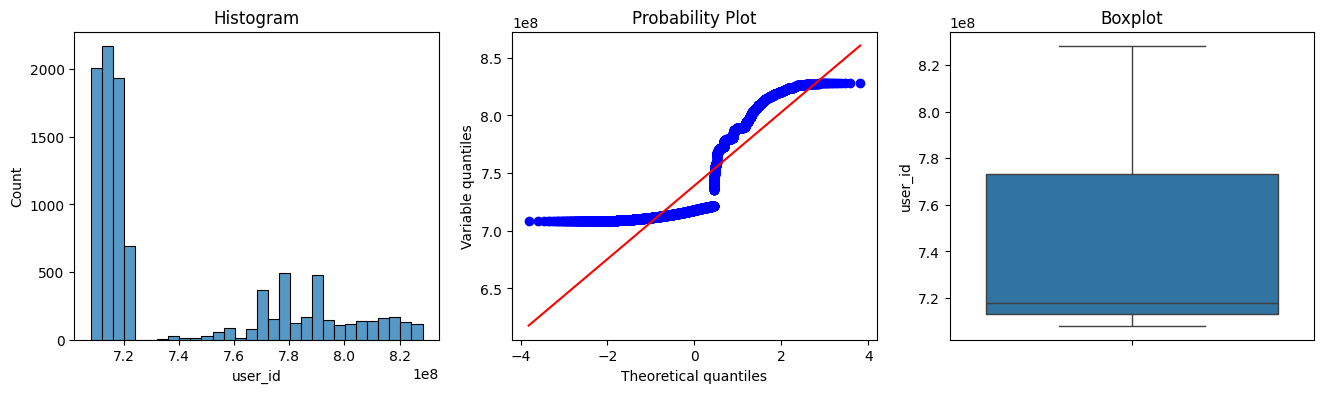

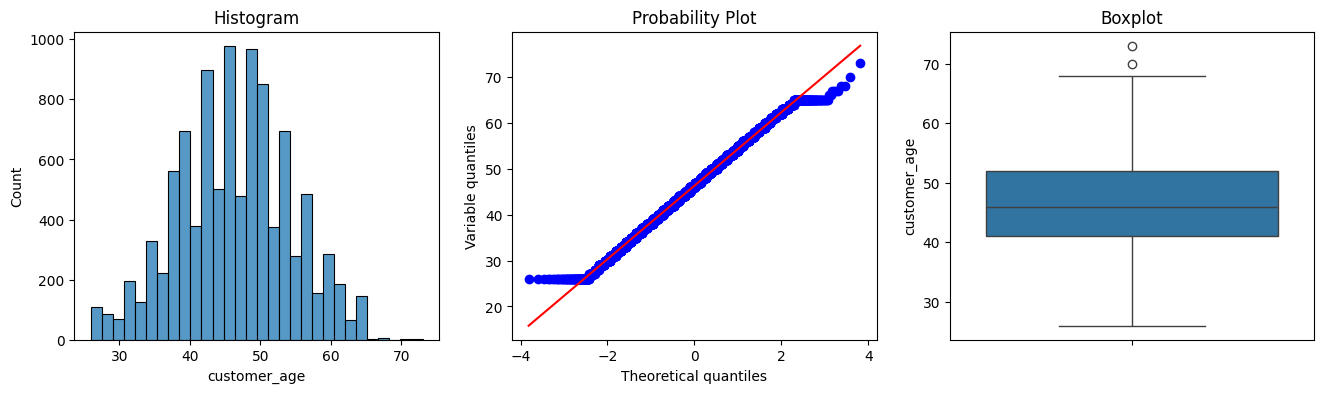

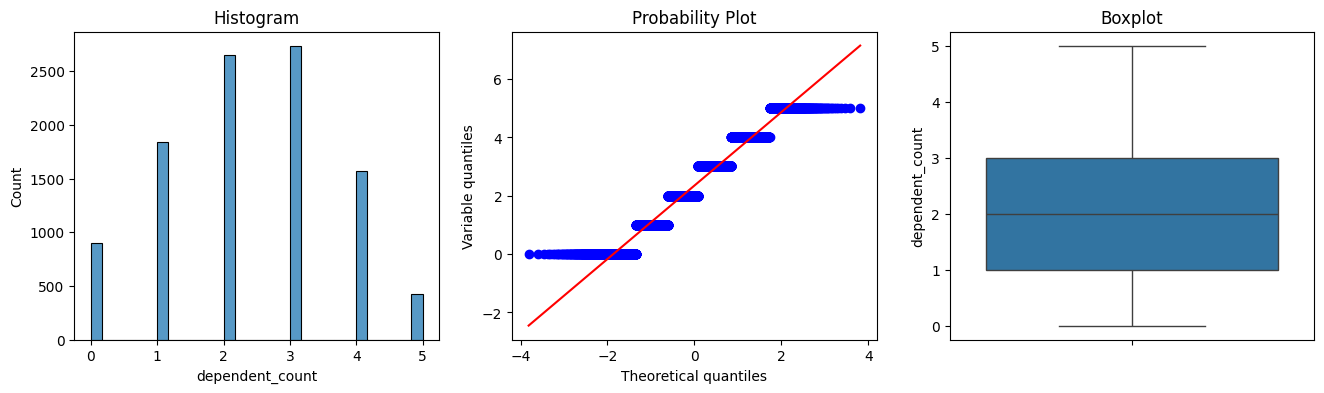

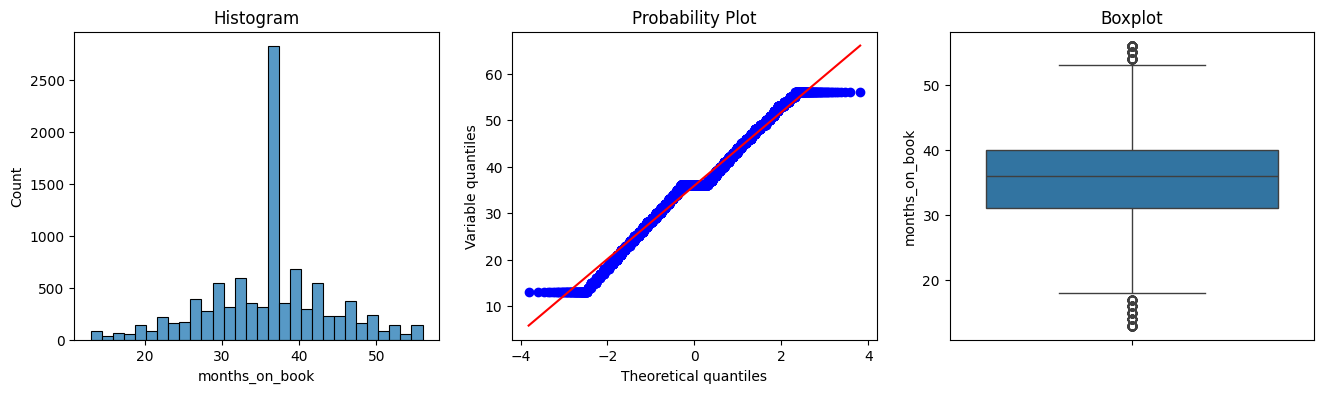

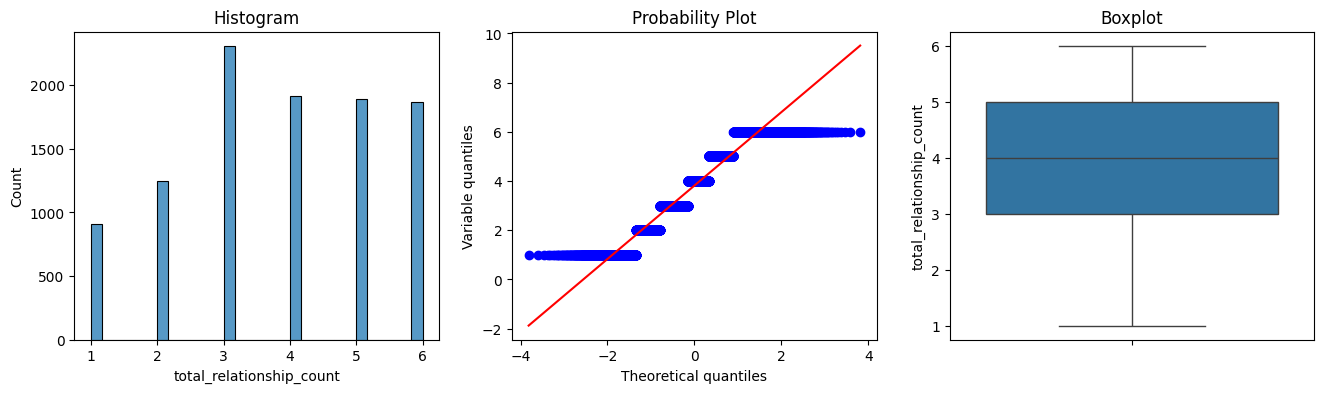

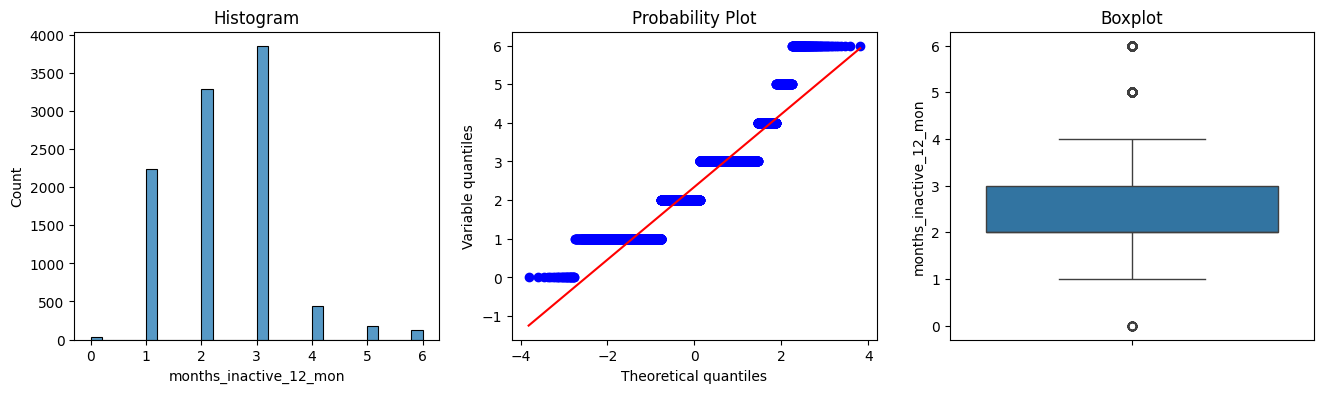

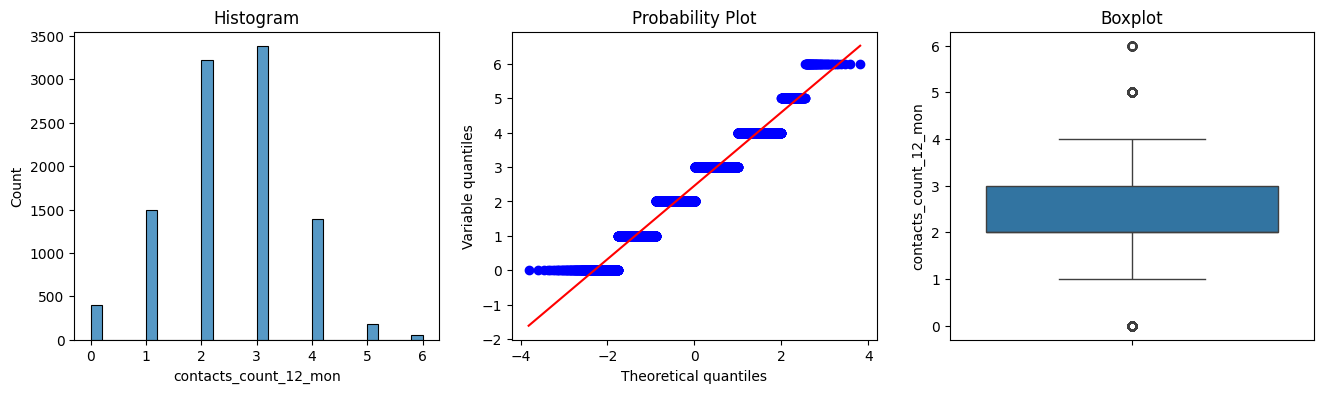

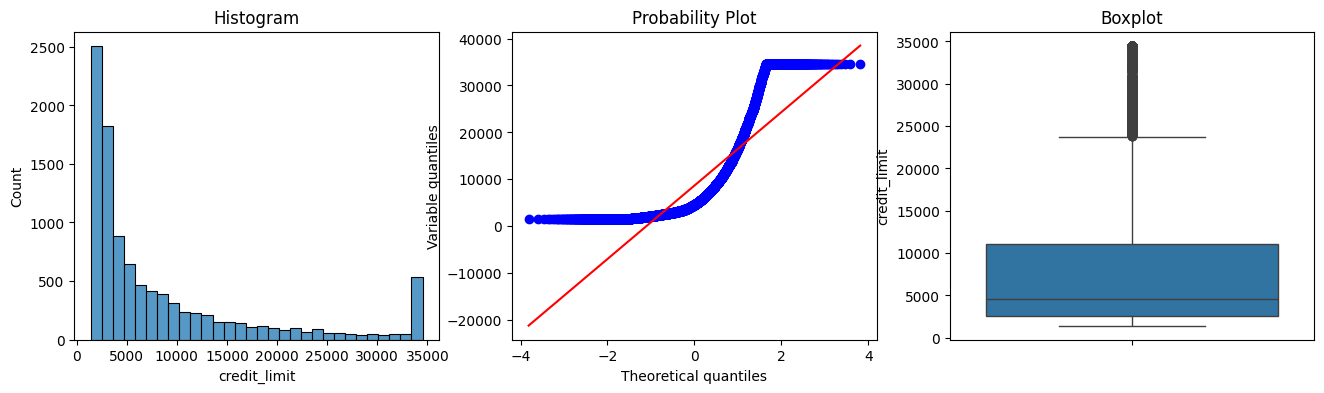

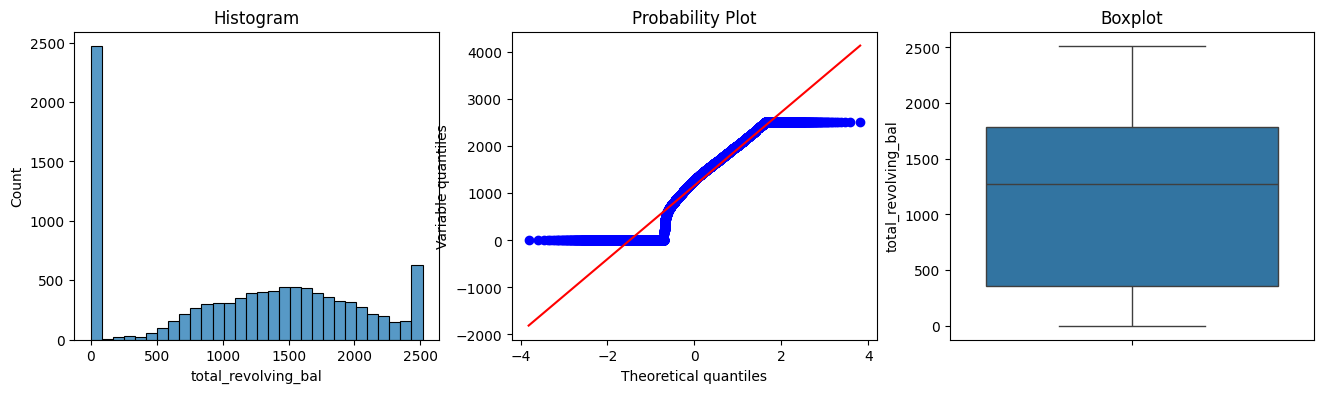

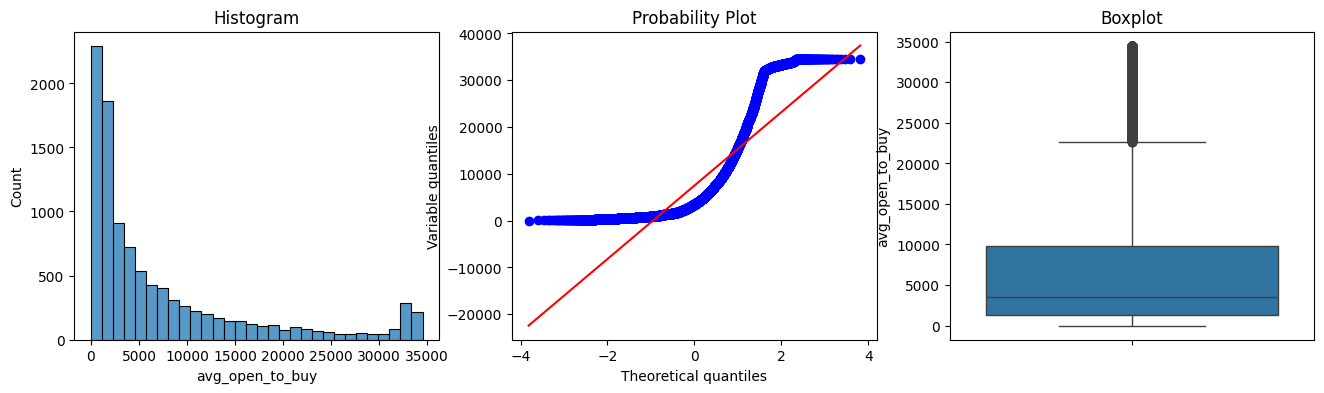

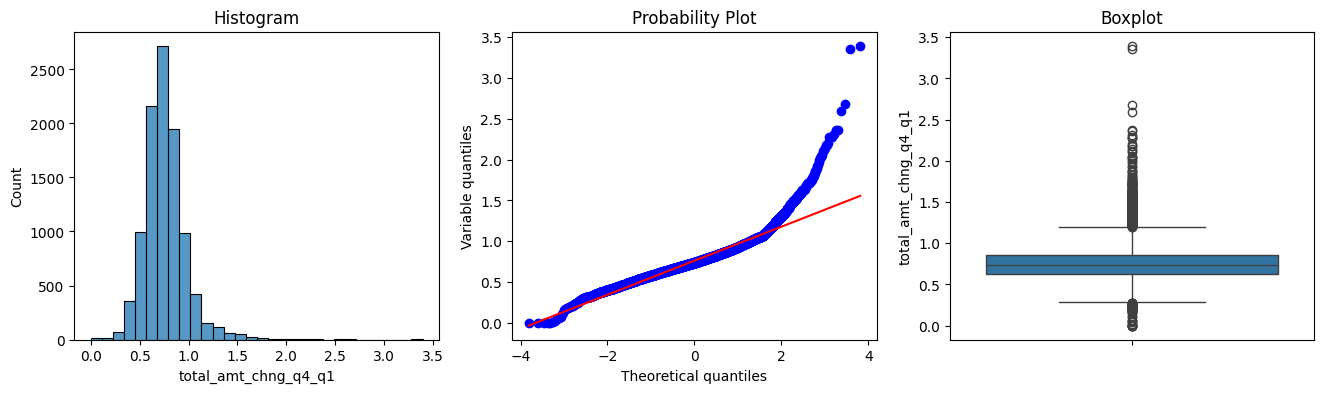

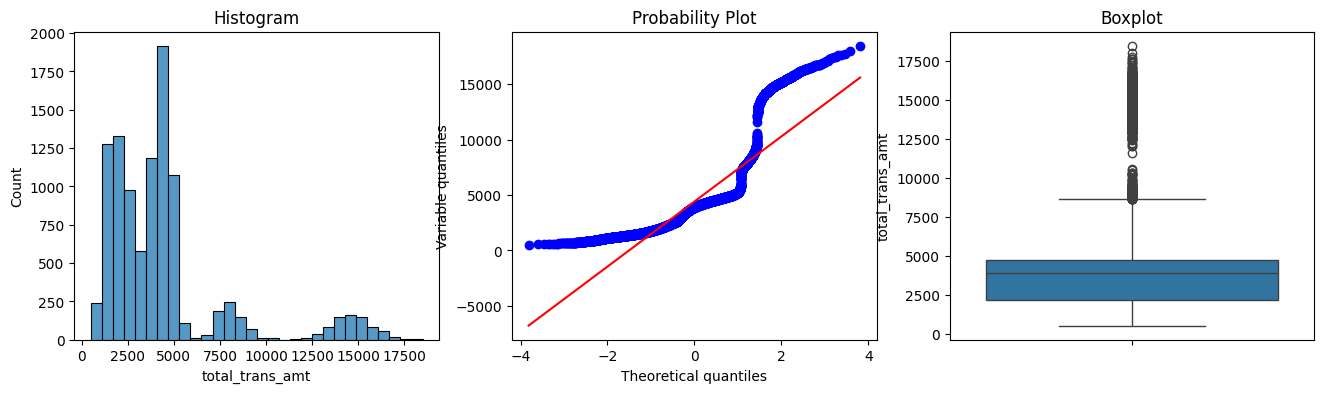

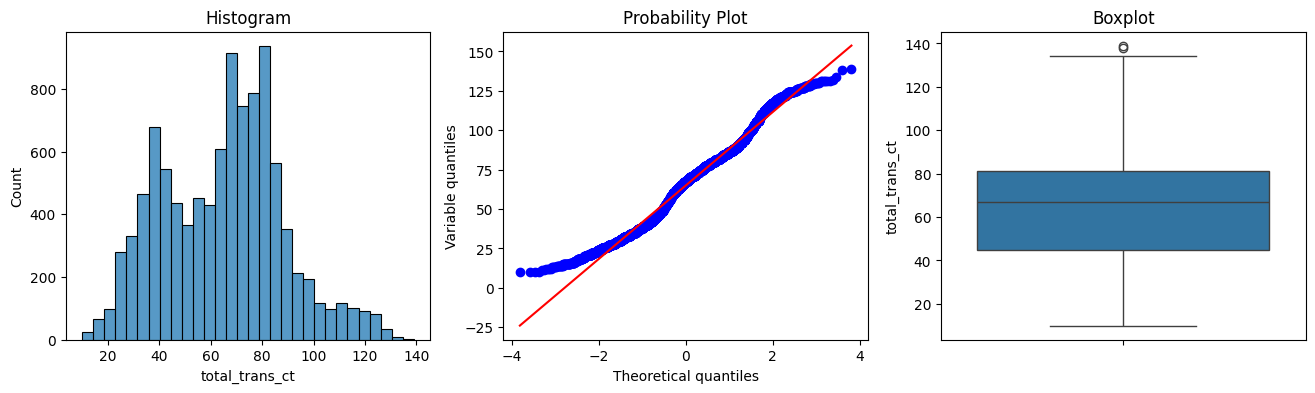

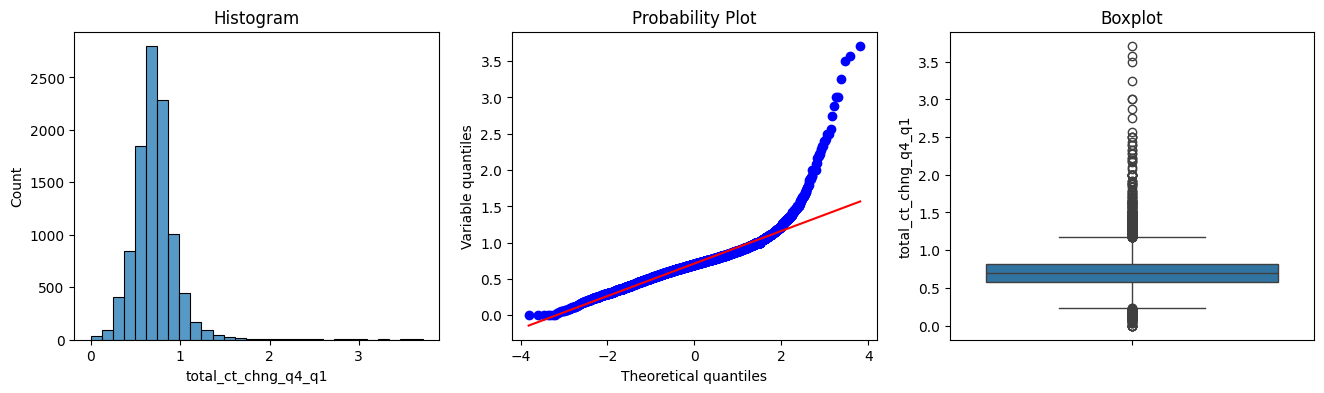

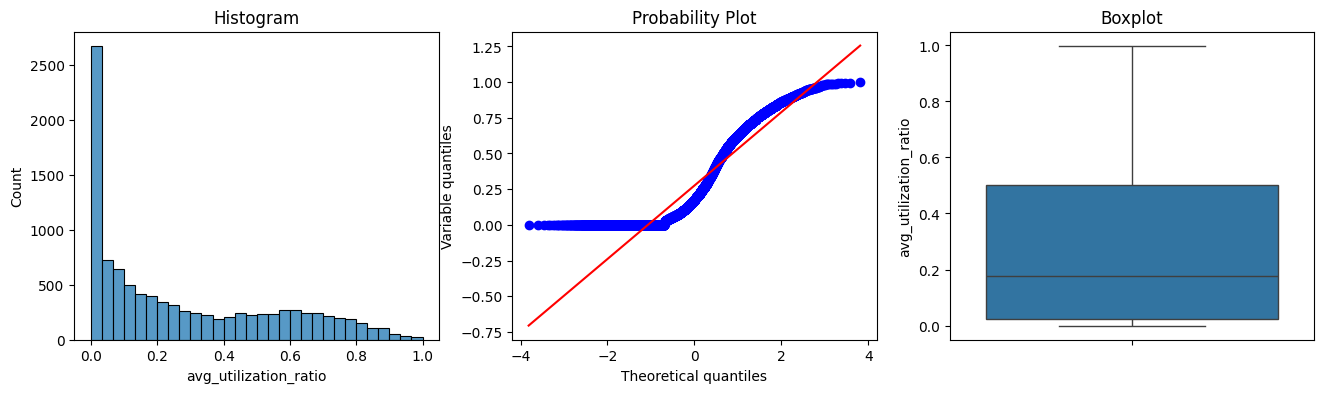

In [ ]:
# Memvisualisasikan outlier
for kolom in ['user_id', 'customer_age', 'dependent_count', 'months_on_book', 'total_relationship_count', 'months_inactive_12_mon', 'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal', 'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt', 'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio']:
    df_churn = df_churn.copy()
    check_plot(df_churn, kolom)

In [ ]:
def calc_outliers(df_churn, column):
    q1 = df_churn[column].quantile(0.25)
    q3 = df_churn[column].quantile(0.75)
    iqr = q3 - q1
    upper_fence = q3 + 1.5 * iqr
    lower_fence = q1 - 1.5 * iqr

    print(f"\n[{column}]")
    print(f"Q1: {q1:.2f}, Median: {df_churn[column].median():.2f}, Q3: {q3:.2f}")
    print(f"Upper Fence: {upper_fence:.2f}, Lower Fence: {lower_fence:.2f}")
    print(f"Min: {df_churn[column].min():.2f}, Max: {df_churn[column].max():.2f}")

    outliers_upper = df_churn[df_churn[column] > upper_fence][column]
    outliers_lower = df_churn[df_churn[column] < lower_fence][column]

    print(f"Outliers di atas Upper Fence: {list(outliers_upper)}")
    print(f"Outliers di bawah Lower Fence: {list(outliers_lower)}")

# Daftar kolom yang akan dicek
columns_to_check = ['user_id', 'customer_age', 'dependent_count', 'months_on_book', 'total_relationship_count', 'months_inactive_12_mon', 'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal', 'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt', 'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio']

for col in columns_to_check:
    calc_outliers(df_churn, col)


[user_id]
Q1: 713036770.50, Median: 717926358.00, Q3: 773143533.00
Upper Fence: 863303676.75, Lower Fence: 622876626.75
Min: 708082083.00, Max: 828343083.00
Outliers di atas Upper Fence: []
Outliers di bawah Lower Fence: []

[customer_age]
Q1: 41.00, Median: 46.00, Q3: 52.00
Upper Fence: 68.50, Lower Fence: 24.50
Min: 26.00, Max: 73.00
Outliers di atas Upper Fence: [73, 70]
Outliers di bawah Lower Fence: []

[dependent_count]
Q1: 1.00, Median: 2.00, Q3: 3.00
Upper Fence: 6.00, Lower Fence: -2.00
Min: 0.00, Max: 5.00
Outliers di atas Upper Fence: []
Outliers di bawah Lower Fence: []

[months_on_book]
Q1: 31.00, Median: 36.00, Q3: 40.00
Upper Fence: 53.50, Lower Fence: 17.50
Min: 13.00, Max: 56.00
Outliers di atas Upper Fence: [54, 56, 56, 56, 54, 56, 56, 56, 54, 55, 56, 56, 54, 54, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 54, 54, 56, 54, 54, 55, 54, 56, 56, 56, 56, 56, 56, 56, 54, 54, 56, 56, 55, 55, 54, 54, 55, 56, 56, 55, 55, 56, 56, 54, 55, 55, 56, 56, 54, 56, 54, 56, 55, 56, 56, 56,

In [ ]:
def check_outliers_zscore(df, column, window=100, threshold=2.5):
    df["rolling_mean"] = df[column].rolling(window=window, center=True).mean()
    df["rolling_std"] = df[column].rolling(window=window, center=True).std()

    df["z_score"] = (df[column] - df["rolling_mean"]) / df["rolling_std"]

    outliers = df[(df["z_score"].abs() > threshold)]
    print(f"\n[{column}]")
    print(f"Jumlah outlier: {len(outliers)}")
    print(outliers[[column, "z_score"]].head())

for col in ['months_on_book', 'credit_limit', 'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt', 'total_ct_chng_q4_q1']:
    check_outliers_zscore(df_churn, col)


[months_on_book]
Jumlah outlier: 139
     months_on_book   z_score
67               20 -2.624094
108              56  2.615627
151              56  2.511958
514              13 -2.776977
521              13 -2.820821

[credit_limit]
Jumlah outlier: 339
     credit_limit   z_score
229       34516.0  2.541505
260       34516.0  2.525871
280       34516.0  2.696048
303       34516.0  2.636596
321       34516.0  2.506003

[avg_open_to_buy]
Jumlah outlier: 338
     avg_open_to_buy   z_score
229          32850.0  2.515166
237          34516.0  2.524584
260          32864.0  2.503254
280          33076.0  2.672383
303          32455.0  2.547537

[total_amt_chng_q4_q1]
Jumlah outlier: 194
     total_amt_chng_q4_q1   z_score
142                 1.996  2.574578
154                 2.121  2.910754
177                 2.053  2.795807
219                 2.368  4.146251
231                 1.727  2.685840

[total_trans_amt]
Jumlah outlier: 94
     total_trans_amt   z_score
77              2339  3.

- months_on_book → Rentang 13-56 bulan masih wajar untuk durasi keanggotaan.
- credit_limit → Kredit hingga 34.516 masih valid karena setiap pelanggan bisa punya batas kredit tinggi.
- avg_open_to_buy → Nilai tinggi bisa terjadi jika pelanggan jarang memakai kartu kreditnya.
- total_trans_amt → Nilai transaksi tinggi bisa berasal dari pelanggan dengan aktivitas belanja lebih besar.

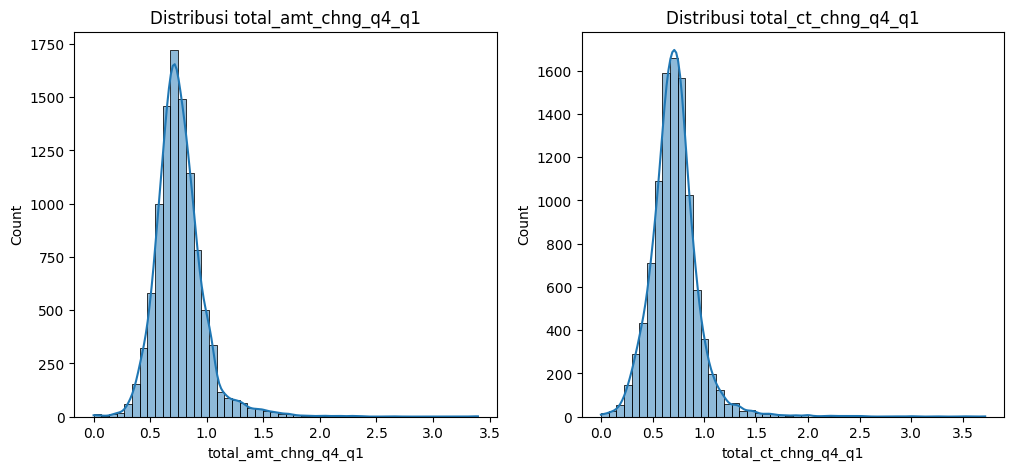

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df_churn["total_amt_chng_q4_q1"], bins=50, kde=True, ax=axes[0])
sns.histplot(df_churn["total_ct_chng_q4_q1"], bins=50, kde=True, ax=axes[1])
axes[0].set_title("Distribusi total_amt_chng_q4_q1")
axes[1].set_title("Distribusi total_ct_chng_q4_q1")
plt.show()

<Axes: xlabel='attrition_flag', ylabel='total_amt_chng_q4_q1'>

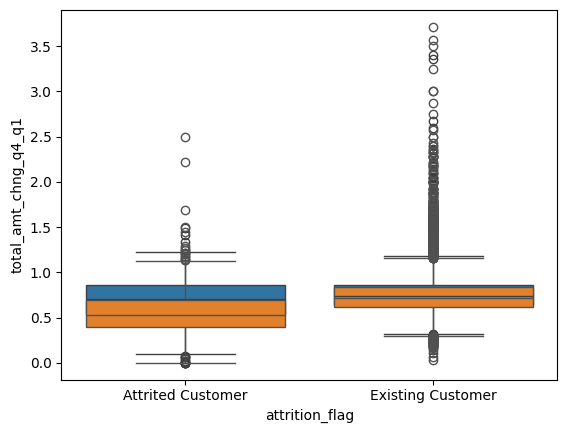

In [ ]:
sns.boxplot(x=df_churn["attrition_flag"], y=df_churn["total_amt_chng_q4_q1"])
sns.boxplot(x=df_churn["attrition_flag"], y=df_churn["total_ct_chng_q4_q1"])

Perubahan transaksi (total_amt_chng_q4_q1) antara pelanggan yang churn dan tidak churn memiliki distribusi yang mirip, dengan median dan IQR yang hampir sama.
Terdapat banyak outlier, terutama pada pelanggan yang masih bertahan (Existing Customer), yang mungkin menunjukkan segmen pelanggan dengan pola transaksi unik.
Outlier tidak langsung dihapus, karena bisa jadi merupakan pelanggan dengan aktivitas transaksi yang tinggi, bukan kesalahan data.

In [ ]:
# drop kolom hasil outlier
df_churn = df_churn.drop(columns=['rolling_mean', 'rolling_std', 'z_score'])

## `EXPLORATORY DATA ANALYSIS (EDA)`

### Perbandingan Antara Pelanggan yang Churn dan Tidak Churn

In [ ]:
print(df_churn[["attrition_flag"]].value_counts())

attrition_flag   
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


In [ ]:
labels = df_churn['attrition_flag'].value_counts().index
size = df_churn['attrition_flag'].value_counts().values

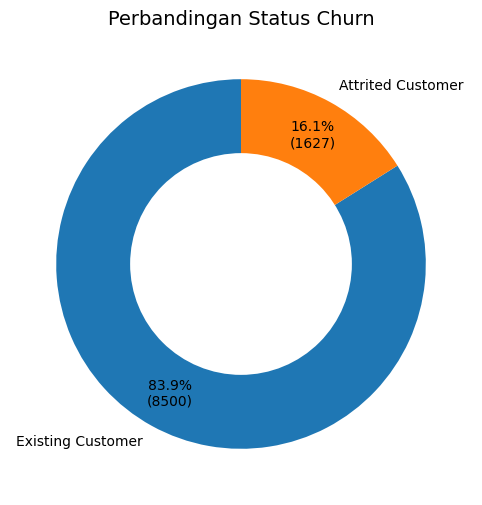

In [ ]:
fig, ax = plt.subplots(figsize=(10.9, 6))
ax.pie(
    size, labels=labels, autopct=lambda p: f'{p:.1f}%\n({int(p * sum(size) / 100)})',
    startangle=90, pctdistance=0.80, textprops={'fontsize': 10, 'color': 'black'})
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig.gca().add_artist(centre_circle)
ax.set_title('Perbandingan Status Churn', fontsize=14)
plt.show()

### Distribusi Usia dan Churn

In [ ]:
age_distribution = df_churn.groupby("customer_age")['attrition_flag'].value_counts().unstack()
age_distribution.T

customer_age,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,73
attrition_flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Attrited Customer,6,3,1,7,15,13,17,20,19,21,24,37,47,48,64,76,62,85,84,79,82,76,85,79,71,58,58,59,69,51,43,33,24,40,13,17,17,8,5,9,1,0,1,0,0
Existing Customer,72,29,28,49,55,78,89,107,127,163,197,223,256,285,297,303,364,388,416,407,408,403,387,416,381,340,318,328,238,228,219,190,133,117,114,76,76,57,38,92,1,4,1,1,1


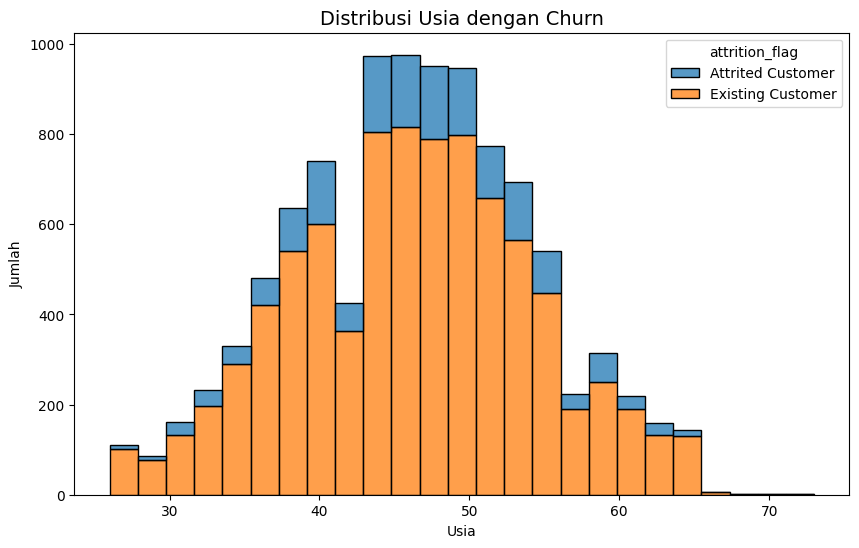

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df_churn, x='customer_age', hue='attrition_flag', bins=25,
             multiple='stack', kde=False, ax=ax)
ax.set_title('Distribusi Usia dengan Churn', fontsize=14)
ax.set_xlabel('Usia')
ax.set_ylabel('Jumlah')
plt.show()

Rentang umur 45-50 tahun memiliki proporsi yang lebih besar terhadap pelanggan yang berhenti berlangganan Attrited Customer(churn).

### Hubungan Churn dengan tingkat pendidikan dan kategori pendapatan

a. Rata-Rata Usia per Kategori Pendidikan & Pendapatan

In [ ]:
edu_income = df_churn.groupby(["education_level", "income_category"], observed=False)["customer_age"].mean().unstack()
edu_income.T

education_level,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Unknown
income_category,,,,,,,
$120K +,49.485714,47.000000,47.887255,47.312925,47.700000,47.285714,46.858333
$40K - $60K,45.142077,47.200000,45.826401,46.039437,45.846847,46.995984,46.297398
$60K - $80K,44.507576,46.542373,45.954976,45.859935,46.272727,46.502564,46.304762
$80K - $120K,45.897143,47.070175,46.433054,46.581169,46.012346,46.617512,46.424658
Less than $40K,46.431884,47.291139,46.216857,46.597615,44.741176,45.883142,46.602518
Unknown,45.527778,48.157143,46.867470,45.782222,44.553191,46.313514,45.834483


b. Distribusi Churn Berdasarkan Pendidikan & Pendapatan

In [ ]:
data_edu_income_churn = pd.crosstab([df_churn["education_level"], df_churn["income_category"]], df_churn["attrition_flag"]).T
data_edu_income_churn

education_level   College                                                      \
income_category   $120K + $40K - $60K $60K - $80K $80K - $120K Less than $40K   
attrition_flag                                                                  
Attrited Customer      12          24          17           36             49   
Existing Customer      58         159         115          139            296   

education_level           Doctorate                                       \
income_category   Unknown   $120K + $40K - $60K $60K - $80K $80K - $120K   
attrition_flag                                                             
Attrited Customer      16         8          11           7           11   
Existing Customer      92        29          59          52           46   

education_level                          Graduate                          \
income_category   Less than $40K Unknown  $120K + $40K - $60K $60K - $80K   
attrition_flag                                                              
Attrited Customer             42      16       32          77          52   
Existing Customer            116      54      172         476         370   

education_level                                       High School              \
income_category   $80K - $120K Less than $40K Unknown     $120K + $40K - $60K   
attrition_flag                                                                  
Attrited Customer           67            210      49          28          51   
Existing Customer          411            929     283         119         304   

education_level                                                    \
income_category   $60K - $80K $80K - $120K Less than $40K Unknown   
attrition_flag                                                      
Attrited Customer          42           41            101      43   
Existing Customer         265          267            570     182   

education_level   Post-Graduate                                       \
income_category         $120K + $40K - $60K $60K - $80K $80K - $120K   
attrition_flag                                                         
Attrited Customer             4          17          16           17   
Existing Customer            26          94          61           64   

education_level                          Uneducated                          \
income_category   Less than $40K Unknown    $120K + $40K - $60K $60K - $80K   
attrition_flag                                                                
Attrited Customer             34       4         23          41          24   
Existing Customer            136      43         96         208         171   

education_level                                       Unknown              \
income_category   $80K - $120K Less than $40K Unknown $120K + $40K - $60K   
attrition_flag                                                              
Attrited Customer           37             80      32      19          50   
Existing Customer          180            442     153     101         219   

education_level                                                    
income_category   $60K - $80K $80K - $120K Less than $40K Unknown  
attrition_flag                                                     
Attrited Customer          31           33             96      27  
Existing Customer         179          186            460     118

c. Mengukur Korelasi dengan Cramér’s V

In [ ]:
from scipy.stats import chi2_contingency
def cramers_v(x, y, data):
    chi2, _, _, _ = chi2_contingency(pd.crosstab(data[x], data[y]))
    return np.sqrt(chi2 / (len(data) * (min(pd.crosstab(data[x], data[y]).shape) - 1)))
cols = ["education_level", "income_category", "attrition_flag"]
korelasi = pd.DataFrame([[cramers_v(x, y, df_churn) if x != y else 1 for y in cols] for x in cols], index=cols, columns=cols)
korelasi.T

,education_level,income_category,attrition_flag
education_level,1.000000,0.029895,0.035149
income_category,0.029895,1.000000,0.035597
attrition_flag,0.035149,0.035597,1.000000


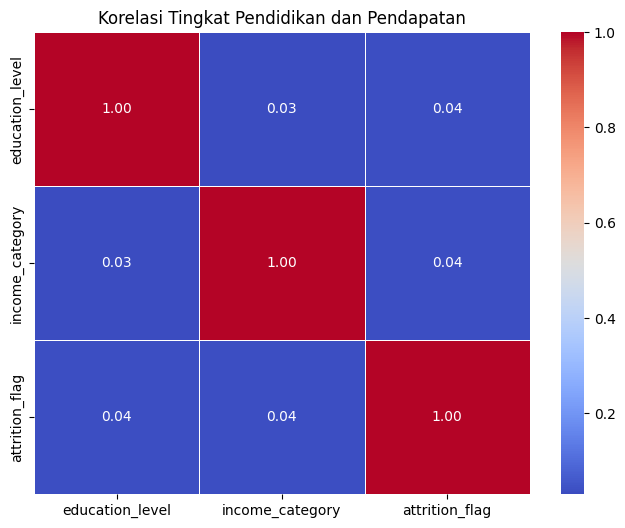

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi Tingkat Pendidikan dan Pendapatan')
plt.show()

Korelasi antara tingkat pendidikan dan pendapatan sangat rendah (Cramér's V = 0.0299). Korelasi antara tingkat pendidikan dan churn (0.0351) serta kategori pendapatan dan churn (0.0356) juga sangat lemah, menunjukkan tidak ada asosiasi signifikan antara kedua prediktor tersebut dengan churn.

### Hubungan Churn dengan Jenis Kelamin

In [ ]:
gender_churn = pd.crosstab(df_churn["gender"], df_churn["attrition_flag"])
gender_churn

attrition_flag,Attrited Customer,Existing Customer
gender,,
F,930,4428
M,697,4072


In [ ]:
gender_churn = pd.crosstab(df_churn["gender"], df_churn["attrition_flag"], normalize="index")
gender_churn.T

gender,F,M
attrition_flag,,
Attrited Customer,0.173572,0.146152
Existing Customer,0.826428,0.853848


In [ ]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(gender_churn)
print(f"Chi-square: {chi2:.4f}")
print(f"P-value: {p:.4f}")

Chi-square: 0.0000
P-value: 1.0000


Terdapat perbedaan yang signifikan antara gender dengan kemungkinan nasabah untuk churn, berdasarkan hasil uji Chi-Square. Karena p-value (0.0002) jauh lebih kecil dari 0.05, menunjukkan bahwa perbedaan antara gender (F dan M) terkait dengan kemungkinan churn adalah signifikan secara statistik. Dengan kata lain, pelanggan pria dan wanita memiliki perbedaan dalam tingkat churn.

### Hubungan Churn dengan Lama Berlangganan

a. Statistik Deskriptif Lama Berlangganan

In [ ]:
months_on_book_churn = pd.crosstab(df_churn["months_on_book"], df_churn["attrition_flag"]).describe()
months_on_book_churn.T

,count,mean,std,min,25%,50%,75%,max
attrition_flag,,,,,,,,
Attrited Customer,44.0,36.977273,63.267791,1.0,12.00,26.0,43.25,430.0
Existing Customer,44.0,193.181818,298.424177,15.0,63.75,141.0,242.75,2033.0


b. Proporsi Churn

In [ ]:
months_on_book_churn = pd.crosstab(df_churn["months_on_book"], df_churn["attrition_flag"])
months_on_book_churn.T

months_on_book,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56
attrition_flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Attrited Customer,7,1,9,3,4,13,6,13,10,20,12,28,31,24,23,43,34,58,34,44,48,57,45,430,62,57,64,45,51,36,42,42,33,36,24,27,24,25,16,12,7,6,4,17
Existing Customer,63,15,25,26,35,45,57,61,73,85,104,132,134,162,183,232,207,242,284,245,257,296,272,2033,296,290,277,288,246,235,231,188,194,161,147,135,117,71,64,50,71,47,38,86


In [ ]:
months_on_book_churn = pd.crosstab(df_churn["months_on_book"], df_churn["attrition_flag"], normalize="index")
months_on_book_churn.T

months_on_book,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56
attrition_flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Attrited Customer,0.1,0.0625,0.264706,0.103448,0.102564,0.224138,0.095238,0.175676,0.120482,0.190476,0.103448,0.175,0.187879,0.129032,0.11165,0.156364,0.141079,0.193333,0.106918,0.152249,0.157377,0.161473,0.141956,0.174584,0.173184,0.164265,0.187683,0.135135,0.171717,0.132841,0.153846,0.182609,0.145374,0.182741,0.140351,0.166667,0.170213,0.260417,0.2,0.193548,0.089744,0.113208,0.095238,0.165049
Existing Customer,0.9,0.9375,0.735294,0.896552,0.897436,0.775862,0.904762,0.824324,0.879518,0.809524,0.896552,0.825,0.812121,0.870968,0.88835,0.843636,0.858921,0.806667,0.893082,0.847751,0.842623,0.838527,0.858044,0.825416,0.826816,0.835735,0.812317,0.864865,0.828283,0.867159,0.846154,0.817391,0.854626,0.817259,0.859649,0.833333,0.829787,0.739583,0.8,0.806452,0.910256,0.886792,0.904762,0.834951


c. Korelasi Point-Biserial

In [ ]:
from scipy.stats import pointbiserialr
df_churn["attrition_flag"] = df_churn["attrition_flag"].map({"Attrited Customer": 1, "Existing Customer": 0})
corr, p_value = pointbiserialr(df_churn["months_on_book"], df_churn["attrition_flag"])
print(f"Korelasi: {corr:.4f}")
print(f"P-value: {p_value:.4f}")

Korelasi: 0.0137
P-value: 0.1684


Berdasarkan hasil korelasi 0.0137 dan p-value 0.1684, tidak ada hubungan yang signifikan antara lama menjadi nasabah dengan kemungkinan untuk churn. Nilai p-value yang lebih besar dari 0.05 menunjukkan bahwa hubungan antara kedua variabel ini tidak signifikan secara statistik.

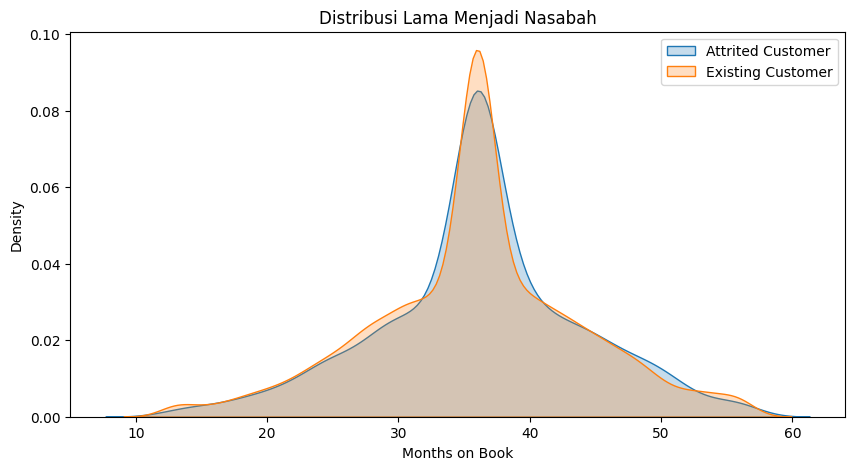

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(df_churn[df_churn["attrition_flag"] == 1]["months_on_book"], label="Attrited Customer", fill=True)
sns.kdeplot(df_churn[df_churn["attrition_flag"] == 0]["months_on_book"], label="Existing Customer", fill=True)
plt.xlabel("Months on Book")
plt.ylabel("Density")
plt.title("Distribusi Lama Menjadi Nasabah")
plt.legend()
plt.show()

In [ ]:
df_churn["attrition_flag"] = df_churn["attrition_flag"].map({1: "Attrited Customer", 0: "Existing Customer"})

### Hubungan antara churn dan frekuensi interaksi

a. Statistik Deskriptif Frekuensi Interaksi

In [ ]:
contacts_churn = pd.crosstab(df_churn["contacts_count_12_mon"], df_churn["attrition_flag"]).describe()
contacts_churn.T

,count,mean,std,min,25%,50%,75%,max
attrition_flag,,,,,,,,
Attrited Customer,7.0,232.428571,246.760246,7.0,56.5,108.0,359.0,681.0
Existing Customer,7.0,1214.285714,1169.067394,0.0,254.5,1077.0,2045.0,2824.0


b. Proporsi Churn

In [ ]:
contacts_churn = pd.crosstab(df_churn["contacts_count_12_mon"], df_churn["attrition_flag"])
contacts_churn.T

contacts_count_12_mon,0,1,2,3,4,5,6
attrition_flag,,,,,,,
Attrited Customer,7,108,403,681,315,59,54
Existing Customer,392,1391,2824,2699,1077,117,0


In [ ]:
contacts_churn = pd.crosstab(df_churn["contacts_count_12_mon"], df_churn["attrition_flag"], normalize="index")
contacts_churn.T

contacts_count_12_mon,0,1,2,3,4,5,6
attrition_flag,,,,,,,
Attrited Customer,0.017544,0.072048,0.124884,0.201479,0.226293,0.335227,1.0
Existing Customer,0.982456,0.927952,0.875116,0.798521,0.773707,0.664773,0.0


c. Korelasi Point-Biserial

In [ ]:
from scipy.stats import pointbiserialr
df_churn["attrition_flag"] = df_churn["attrition_flag"].map({"Attrited Customer": 1, "Existing Customer": 0})
corr, p_value = pointbiserialr(df_churn["contacts_count_12_mon"], df_churn["attrition_flag"])
print(f"Korelasi: {corr:.4f}")
print(f"P-value: {p_value:.4f}")

Korelasi: 0.2045
P-value: 0.0000


d. Uji Chi-Square

In [ ]:
from scipy.stats import chi2_contingency
contacts_churn_ct = pd.crosstab(df_churn["contacts_count_12_mon"], df_churn["attrition_flag"])
chi2, p, dof, expected = chi2_contingency(contacts_churn_ct)
print(f"Chi-square: {chi2:.4f}")
print(f"P-value: {p:.4f}")

Chi-square: 586.6385
P-value: 0.0000


Semakin sering nasabah berinteraksi dengan bank, semakin besar kemungkinan mereka untuk churn. Hal ini didukung oleh korelasi 0.2045 dan p-value 0.0000, yang menunjukkan hubungan signifikan secara statistik.

In [ ]:
df_churn["attrition_flag"] = df_churn["attrition_flag"].map({1: "Attrited Customer", 0: "Existing Customer"})

## `MODEL PREPARATION`

### Handling Data Categorical

In [ ]:
# Hapus fitur yang tidak digunakan
df_churn.drop(columns=['user_id'], inplace=True)

**Observasi**<br>
- RowNumber (Nomor baris, tidak relevan)
- CustomerId (ID pelanggan, tidak berguna untuk prediksi)
- Surname (Nama belakang, tidak berkontribusi terhadap prediksi)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding untuk kategori ordinal
le = LabelEncoder()
label_cols = ['attrition_flag', 'education_level', 'income_category']

for col in label_cols:
    df_churn[col] = le.fit_transform(df_churn[col])

# One-Hot Encoding untuk kategori nominal
kolom_ohe = ['gender', 'marital_status', 'card_category']
df_churn = pd.get_dummies(df_churn, columns=kolom_ohe, drop_first=False, dtype=int)

# Susun ulang posisi kolom agar 'Churn' (Exited) ada di akhir
posisi = [col for col in df_churn.columns if col != 'attrition_flag'] + ['attrition_flag']
df_churn = df_churn[posisi]

In [ ]:
df_churn.head(5)

,customer_age,dependent_count,education_level,income_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,gender_F,gender_M,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown,card_category_Blue,card_category_Gold,card_category_Platinum,card_category_Silver,attrition_flag
0,45,3,3,2,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,1,0,1,0,0,1,0,0,0,1
1,49,5,2,4,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1,0,0,0,1,0,1,0,0,0,1
2,51,3,2,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,1,0,1,0,0,1,0,0,0,1
3,40,4,3,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1,0,0,0,0,1,1,0,0,0,1
4,40,3,5,2,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,1,0,1,0,0,1,0,0,0,1


### Feature Scaling

Metode feature scaling yang umum digunakan adalah MinMaxScaler dan StandardScaler. Dalam kasus ini, `StandardScaler` dipilih karena data memiliki skala yang berbeda dan kemungkinan ada outlier, sehingga lebih stabil tanpa terlalu dipengaruhi nilai ekstrem.

Fitur yang perlu distandarasi menggunakan StandardScaler adalah fitur numerik yang memiliki skala yang sangat berbeda atau nilai yang bisa bervariasi dalam rentang yang besar.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fitur yang di-scaling
features_to_scale = ['customer_age', 'dependent_count', 'months_on_book', 'total_relationship_count', 'months_inactive_12_mon', 'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
    'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt', 'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio']

In [ ]:
# cek jika ada missing value
print(df_churn[features_to_scale].isnull().sum())

customer_age                0
dependent_count             0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit                0
total_revolving_bal         0
avg_open_to_buy             0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_trans_ct              0
total_ct_chng_q4_q1         0
avg_utilization_ratio       0
dtype: int64


In [ ]:
# Melakukan scaling
df_churn[features_to_scale] = scaler.fit_transform(df_churn[features_to_scale])

In [ ]:
df_churn.sample(2)

,customer_age,dependent_count,education_level,income_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,gender_F,gender_M,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown,card_category_Blue,card_category_Gold,card_category_Platinum,card_category_Silver,attrition_flag
6946,0.208826,-0.266547,0,4,0.008965,0.120579,0.65194,-1.315636,-0.791527,-1.426858,-0.663441,-0.077285,0.149814,0.730306,0.461107,-0.997155,1,0,0,1,0,0,1,0,0,0,1
3594,0.084082,1.273283,5,5,0.008965,-0.522785,0.65194,0.492404,1.126835,-1.426858,1.254517,-0.565433,-0.701535,-1.144315,-0.807405,-0.997155,0,1,0,0,0,1,1,0,0,0,0


###  Feature Correlation Matrix

In [ ]:
df_churn.describe().fillna(0)

,customer_age,dependent_count,education_level,income_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,gender_F,gender_M,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown,card_category_Blue,card_category_Gold,card_category_Platinum,card_category_Silver,attrition_flag
count,1.012700e+04,1.012700e+04,10127.000000,10127.000000,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,1.333101e-16,-7.577626e-17,3.096574,2.863928,-3.381866e-16,-4.490445e-17,1.613754e-16,-7.858279e-17,1.347133e-16,-7.016320e-17,4.490445e-17,-1.276970e-16,-8.980890e-17,-2.245222e-16,-3.101213e-16,-9.542195e-17,0.529081,0.470919,0.073862,0.462822,0.389355,0.073961,0.931767,0.011455,0.001975,0.054804,0.839340
std,1.000049e+00,1.000049e+00,1.834812,1.504700,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,0.499178,0.499178,0.261559,0.498641,0.487628,0.261720,0.252159,0.106416,0.044398,0.227608,0.367235
min,-2.535541e+00,-1.806378e+00,0.000000,0.000000,-2.871068e+00,-1.809512e+00,-2.316674e+00,-2.219655e+00,-7.915266e-01,-1.426858e+00,-8.213361e-01,-3.466947e+00,-1.146344e+00,-2.337256e+00,-2.991597e+00,-9.971550e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.643815e-01,-1.036462e+00,2.000000,2.000000,-6.171294e-01,-5.227845e-01,-3.375979e-01,-4.116160e-01,-6.686548e-01,-9.863389e-01,-6.759604e-01,-5.882438e-01,-6.619405e-01,-8.460801e-01,-5.469820e-01,-9.137243e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,-4.066159e-02,-2.665471e-01,3.000000,3.000000,8.964513e-03,1.205790e-01,-3.375979e-01,-4.116160e-01,-4.492525e-01,1.388875e-01,-4.394979e-01,-1.092203e-01,-1.486877e-01,9.123036e-02,-4.293775e-02,-3.587287e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,7.078024e-01,5.033681e-01,5.000000,4.000000,5.098397e-01,7.639426e-01,6.519402e-01,4.924038e-01,2.679862e-01,7.622408e-01,2.629041e-01,4.519214e-01,9.918090e-02,6.877007e-01,4.443050e-01,8.274384e-01,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,3.327426e+00,2.043199e+00,6.000000,5.000000,2.513340e+00,1.407306e+00,3.620555e+00,3.204463e+00,2.848054e+00,1.661686e+00,2.975375e+00,1.203060e+01,4.144855e+00,3.158792e+00,1.260857e+01,2.626640e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
corr = df_churn.corr()

In [ ]:
corr

,customer_age,dependent_count,education_level,income_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,gender_F,gender_M,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown,card_category_Blue,card_category_Gold,card_category_Platinum,card_category_Silver,attrition_flag
customer_age,1.000000,-0.122254,0.004083,-0.013474,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114,0.017312,-0.017312,-0.042614,0.047364,-0.011248,-0.026694,0.021409,-0.011901,0.006515,-0.019425,-0.018203
dependent_count,-0.122254,1.000000,0.003788,-0.035417,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135,-0.004563,0.004563,0.006697,0.014385,-0.040707,0.041743,-0.027671,0.027035,0.003555,0.017322,-0.018991
education_level,0.004083,0.003788,1.000000,-0.010442,-0.004953,0.009636,-0.008077,0.008500,0.003076,0.008029,0.002356,0.005534,0.015287,0.003046,0.007279,0.006477,-0.000694,0.000694,-0.005399,-0.013346,0.013710,0.005278,0.009335,-0.010724,0.004932,-0.006290,-0.005551
income_category,-0.013474,-0.035417,-0.010442,1.000000,-0.016375,0.008138,0.024037,-0.018367,-0.225394,-0.025815,-0.223033,-0.004534,-0.014686,0.033498,0.014892,0.123287,0.539731,-0.539731,0.000447,-0.013587,0.012454,0.002236,0.056994,-0.034054,-0.001890,-0.046852,-0.017584
months_on_book,0.788912,-0.103062,-0.004953,-0.016375,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541,0.006728,-0.006728,-0.027678,0.033194,-0.005065,-0.026145,0.014934,-0.005426,0.001791,-0.014357,-0.013687
total_relationship_count,-0.010931,-0.039076,0.009636,0.008138,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663,-0.003157,0.003157,0.009276,0.017001,-0.017329,-0.009376,0.085789,-0.055678,-0.043289,-0.060566,0.150005
months_inactive_12_mon,0.054361,-0.010768,-0.008077,0.024037,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503,0.011163,-0.011163,0.001796,-0.007065,0.008973,-0.005053,0.016565,-0.003283,-0.004013,-0.016034,-0.152449
contacts_count_12_mon,-0.018452,-0.040505,0.008500,-0.018367,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471,-0.039987,0.039987,-0.008389,0.001598,0.007997,-0.009562,0.000929,-0.000685,0.001797,-0.001059,-0.204491
credit_limit,0.002476,0.068065,0.003076,-0.225394,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965,-0.420806,0.420806,0.022578,-0.056713,0.032309,0.025291,-0.515644,0.234331,0.105976,0.441030,0.023873
total_revolving_bal,0.014780,-0.002688,0.008029,-0.025815,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022,-0.029658,0.029658,-0.002368,0.039124,-0.037794,-0.001756,-0.022681,0.023974,0.005739,0.012799,0.263053


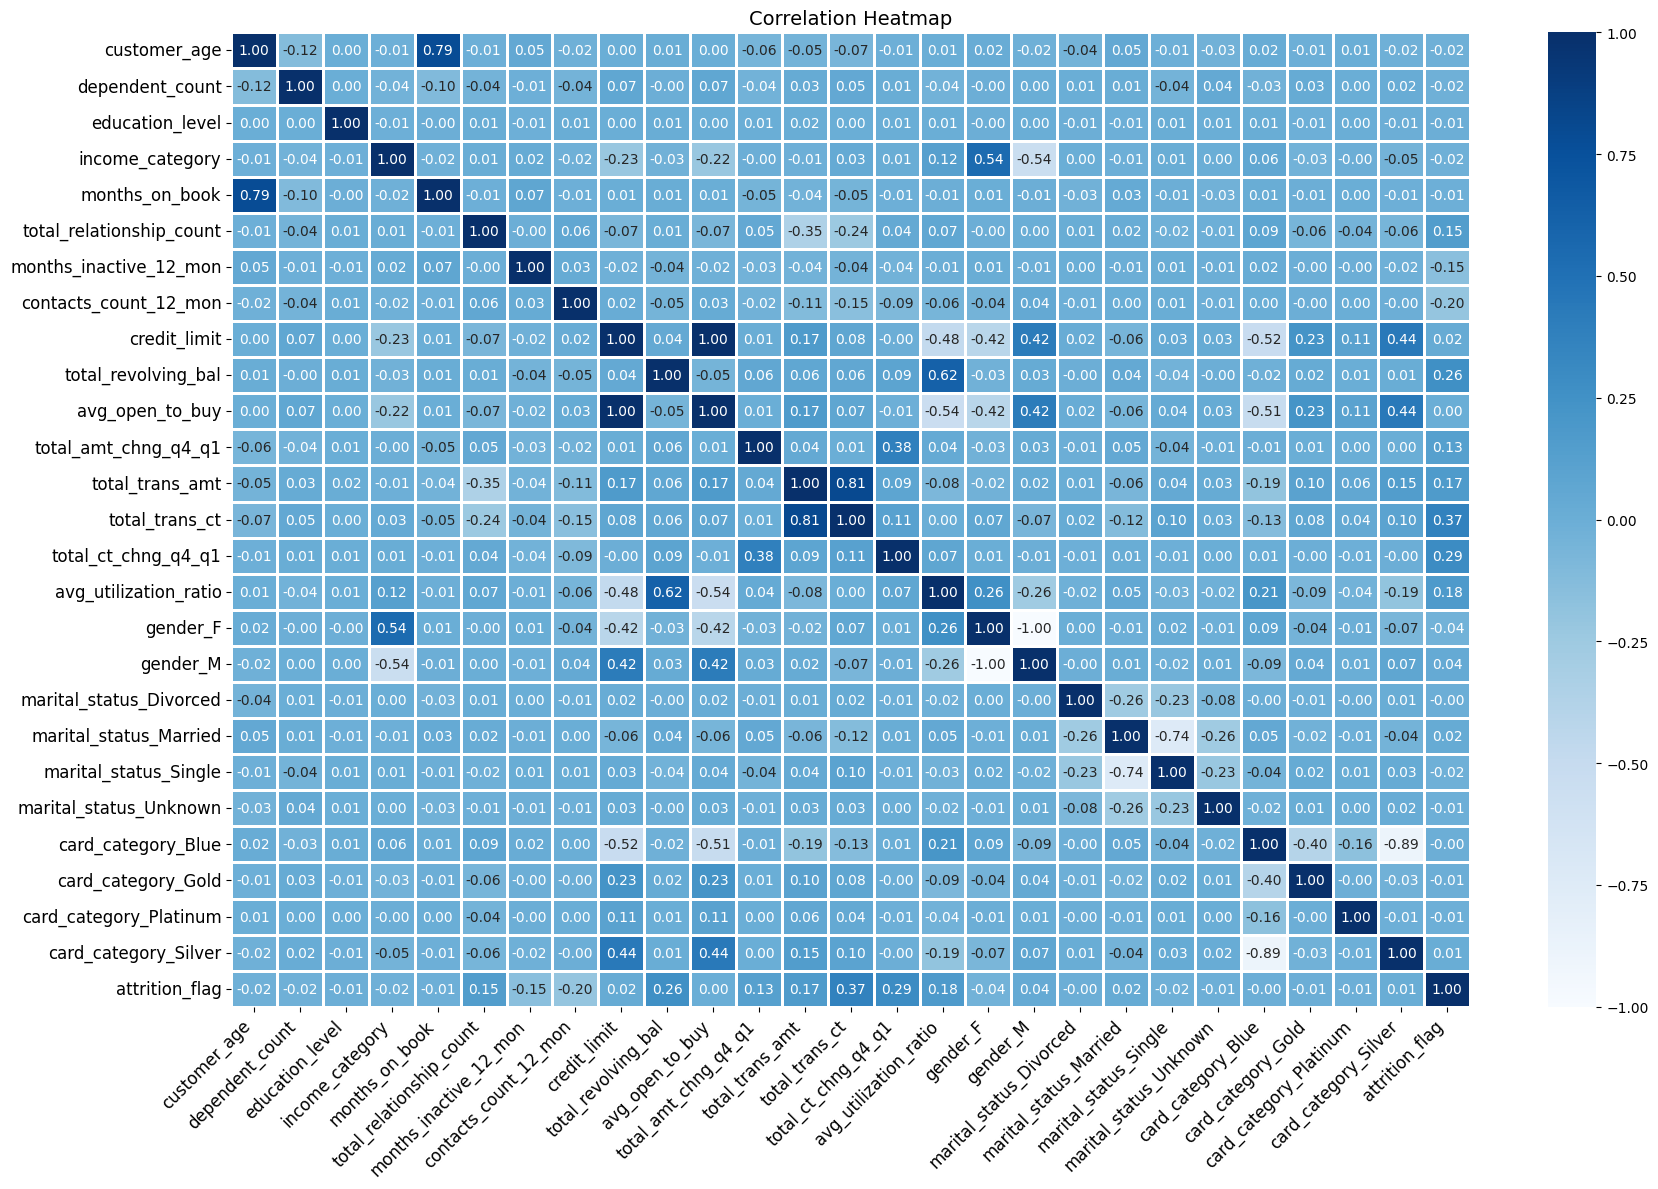

In [ ]:
fig, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues', linewidths=1, ax=ax)
ax.set_title('Correlation Heatmap', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

**Observasi**:<br>

Berdasarkan korelasi tinggi (> 0.8) yang menunjukkan kemungkinan multikolinearitas, fitur yang sebaiknya dihapus adalah:

- gender_F atau gender_M (-1.000 → multikolinearitas sempurna, hapus salah satu).
- credit_limit atau avg_open_to_buy (0.995 → sangat tinggi, hapus salah satu).
- card_category_Silver atau card_category_Blue (-0.89 → korelasi negatif tinggi, hapus salah satu).
- total_trans_amt atau total_trans_ct (0.807 → bisa menjadi redundan, perlu dipertimbangkan).
- marital_status_Unknown (dari 4 kategori marital_status untuk menghindari dummy variable trap).

In [ ]:
df_churn = df_churn.drop(columns=['gender_M', 'avg_open_to_buy', 'card_category_Silver', 'total_trans_amt', 'marital_status_Unknown'])

### Split Dataset

In [ ]:
from sklearn.model_selection import train_test_split

X = df_churn.drop(columns=['attrition_flag'])
y = df_churn['attrition_flag']

In [ ]:
X.head(2)

,customer_age,dependent_count,education_level,income_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_amt_chng_q4_q1,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,gender_F,marital_status_Divorced,marital_status_Married,marital_status_Single,card_category_Blue,card_category_Gold,card_category_Platinum
0,-0.165406,0.503368,3,2,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,2.623494,-0.973895,3.834003,-0.775882,0,0,1,0,1,0,0
1,0.333570,2.043199,2,4,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,3.563293,-1.357340,12.608573,-0.616276,1,0,0,1,1,0,0


In [ ]:
y.head(2)

,attrition_flag
0,1
1,1


In [ ]:
# Split Training dan Sisanya (Validation + Test) - 80% training, 20% sisanya
X_train, X_test_valid, y_train, y_test_valid = train_test_split(X, y, test_size=0.20, random_state=42)

# Bagi Validation dan Test (masing-masing 10%)
X_validation, X_test, y_validation, y_test = train_test_split(X_test_valid, y_test_valid, test_size=0.50, random_state=42)

`X_test_valid` hanya sebagai langkah sementara, tidak digunakan langsung, membantu memisahkan data validasi dan test. 80% data digunakan untuk training. Dari 20% sisa data, di bagi lagi menjadi: 10% untuk validasi (50% dari 20%), 10% untuk test (50% dari 20%).

In [ ]:
X_train.shape, X_validation.shape, X_test.shape

((8101, 21), (1013, 21), (1013, 21))

In [ ]:
X.columns

Index(['customer_age', 'dependent_count', 'education_level', 'income_category',
       'months_on_book', 'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'total_amt_chng_q4_q1', 'total_trans_ct', 'total_ct_chng_q4_q1',
       'avg_utilization_ratio', 'gender_F', 'marital_status_Divorced',
       'marital_status_Married', 'marital_status_Single', 'card_category_Blue',
       'card_category_Gold', 'card_category_Platinum'],
      dtype='object')

## `MODEL TRAINING`

Analisis ini bertujuan memprediksi Churn pada platform pinjaman online dengan target attrition_flag **0** = Existing, **1** = Attrited (Churn). Model Classification dipilih karena target bersifat biner setelah Label Encoding.

✅ XGBoost – Dipilih karena kemampuannya yang unggul dalam menangani interaksi fitur yang kompleks dan memberikan akurasi tinggi.<br>
✅ Support Vector Machine (SVM) – Dipilih untuk mengeksplorasi pola non-linear dengan performa optimal setelah Feature Scaling.<br>

Model didukung oleh Data Preprocessing seperti Label Encoding, One-Hot Encoding, Feature Scaling, serta seleksi fitur berdasarkan korelasi untuk meningkatkan akurasi model.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [ ]:
# convert to numpy (array)
X_churn_train = X_train.to_numpy() # data fitur
y_churn_train = y_train.to_numpy().reshape(len(y_train),)# data target

# validasi
X_valid = X_validation.to_numpy()
y_valid = y_validation.to_numpy().reshape(len(y_validation),)

In [ ]:
# === Tuning for XGBoost ===
param_grid_xgb = {
    'n_estimators': [100, 300],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.7, 0.8],
    'gamma': [0, 1],
    'scale_pos_weight': [5, 10]
}

In [ ]:
# === Tuning for SVM ===
param_grid_svm = {
    'C': [1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.01, 0.1],
    'class_weight': ['balanced']
}

In [ ]:
# GridSearchCV untuk XGBoost
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
grid_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1)
grid_xgb.fit(X_churn_train, y_churn_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8], 'gamma': [0, 1],
                         'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 300],
                         'scale_pos_weight': [5, 10], 'subsample': [0.8, 1.0]},
             scoring='f1', verbose=1)

In [ ]:
cv_results_xgb = pd.DataFrame(grid_xgb.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
cv_results_xgb = cv_results_xgb.sort_values(by='rank_test_score').head(5)
cv_results_xgb

,params,mean_test_score,rank_test_score
92,"{'colsample_bytree': 0.8, 'gamma': 0, 'learnin...",0.964567,1
93,"{'colsample_bytree': 0.8, 'gamma': 0, 'learnin...",0.964439,2
28,"{'colsample_bytree': 0.7, 'gamma': 0, 'learnin...",0.964248,3
124,"{'colsample_bytree': 0.8, 'gamma': 1, 'learnin...",0.963960,4
29,"{'colsample_bytree': 0.7, 'gamma': 0, 'learnin...",0.962939,5


In [ ]:
# Best parameters and best score for XGBoost
print("Best parameters for XGBoost:", grid_xgb.best_params_)
print("Best score for XGBoost:", grid_xgb.best_score_)

Best parameters for XGBoost: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'scale_pos_weight': 5, 'subsample': 0.8}
Best score for XGBoost: 0.9645670138700169


In [ ]:
best_xgb_model = grid_xgb.best_estimator_
best_xgb_model.fit(X_churn_train, y_churn_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
# GridSearchCV untuk SVM
svm_model = SVC(random_state=42)
grid_svm = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid_svm,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=1)
grid_svm.fit(X_churn_train, y_churn_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [1, 10], 'class_weight': ['balanced'],
                         'gamma': [0.01, 0.1], 'kernel': ['linear', 'rbf']},
             scoring='recall', verbose=1)

In [ ]:
cv_results_svm = pd.DataFrame(grid_svm.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
cv_results_svm = cv_results_svm.sort_values(by='rank_test_score').head(5)
cv_results_svm

,params,mean_test_score,rank_test_score
7,"{'C': 10, 'class_weight': 'balanced', 'gamma':...",0.946919,1
3,"{'C': 1, 'class_weight': 'balanced', 'gamma': ...",0.918541,2
5,"{'C': 10, 'class_weight': 'balanced', 'gamma':...",0.885016,3
1,"{'C': 1, 'class_weight': 'balanced', 'gamma': ...",0.864873,4
4,"{'C': 10, 'class_weight': 'balanced', 'gamma':...",0.834289,5


In [ ]:
# Best parameters and best score for SVM
print("Best parameters for SVM:", grid_svm.best_params_)
print("Best score for SVM:", grid_svm.best_score_)

Best parameters for SVM: {'C': 10, 'class_weight': 'balanced', 'gamma': 0.1, 'kernel': 'rbf'}
Best score for SVM: 0.9469190041924191


In [ ]:
best_svm_model = grid_svm.best_estimator_
best_svm_model.fit(X_churn_train, y_churn_train)

SVC(C=10, class_weight='balanced', gamma=0.1, random_state=42)

### Model Training Evaluation

In [ ]:
# Prediksi Evaluasi Model training XGBoost
y_pred_xgb_best = best_xgb_model.predict(X_valid)

# Evaluasi
print("\n=== Evaluasi Model XGBoost ===")
print("Accuracy:", accuracy_score(y_valid, y_pred_xgb_best))
print("Confusion Matrix:\n", confusion_matrix(y_valid, y_pred_xgb_best))
print("Classification Report:\n", classification_report(y_valid, y_pred_xgb_best))



=== Evaluasi Model XGBoost ===
Accuracy: 0.9279368213228035
Confusion Matrix:
 [[110  62]
 [ 11 830]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.64      0.75       172
           1       0.93      0.99      0.96       841

    accuracy                           0.93      1013
   macro avg       0.92      0.81      0.85      1013
weighted avg       0.93      0.93      0.92      1013



In [ ]:
# Prediksi Evaluasi Model training SVM
y_pred_svm_best = best_svm_model.predict(X_valid)

# Evaluasi
print("\n=== Evaluasi Model SVM ===")
print("Accuracy:", accuracy_score(y_valid, y_pred_svm_best))
print("Confusion Matrix:\n", confusion_matrix(y_valid, y_pred_svm_best))
print("Classification Report:\n", classification_report(y_valid, y_pred_svm_best))


=== Evaluasi Model SVM ===
Accuracy: 0.9160908193484699
Confusion Matrix:
 [[125  47]
 [ 38 803]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75       172
           1       0.94      0.95      0.95       841

    accuracy                           0.92      1013
   macro avg       0.86      0.84      0.85      1013
weighted avg       0.91      0.92      0.92      1013



In [ ]:
print(np.array_equal(y_pred_xgb_best, y_pred_svm_best))

False


### Model Training Validation

Cross-Validation (`CV`) untuk memastikan hasil lebih stabil dan tidak overfitting pada data validasi. Data dipecah menjadi beberapa fold (misalnya 5 fold jika cv=5): Proses diulang hingga semua fold pernah menjadi data validasi. Hasilnya adalah mean score dari akurasi setiap fold. Tujuannya untuk melihat performa model secara konsisten.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Cross-Validation untuk XGBoost
cv_scores_xgb = cross_val_score(best_xgb_model, X_churn_train, y_churn_train, cv=5)
print("\nXGBoost Cross-Validation Scores:", cv_scores_xgb)
print("Mean CV Score:", cv_scores_xgb.mean())


XGBoost Cross-Validation Scores: [0.93892659 0.9345679  0.93950617 0.93950617 0.94320988]
Mean CV Score: 0.9391433423964782


In [ ]:
# Cross-Validation untuk SVM
cv_scores_svm = cross_val_score(best_svm_model, X_churn_train, y_churn_train, cv=5)
print("\nSVM Cross-Validation Scores:", cv_scores_svm)
print("Mean CV Score:", cv_scores_svm.mean())


SVM Cross-Validation Scores: [0.90438001 0.91296296 0.91975309 0.89320988 0.90432099]
Mean CV Score: 0.9069253851836618


## `MODEL EVALUATION`

Pada tahap evaluasi model, digunakan data pengujian (`X_test` dan `y_test`) yang tidak pernah dilibatkan dalam proses pelatihan dan validasi. Evaluasi ini bertujuan untuk menilai performa akhir model dalam memprediksi data baru yang benar-benar tidak terlihat sebelumnya, sehingga memberikan gambaran akurat tentang kemampuan generalisasi model.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [ ]:
# Periksa ukuran masing-masing set
X_train.shape, X_validation.shape, X_test.shape

((8101, 21), (1013, 21), (1013, 21))

In [ ]:
# convert to numpy (array)
# training
X_churn_train = X_train.to_numpy() # data fitur
y_churn_train = y_train.to_numpy().reshape(len(y_train),)# data target

# validasi
X_valid = X_validation.to_numpy()
y_valid = y_validation.to_numpy().reshape(len(y_validation),)

# pengujian (x_test)
X_test = X_test.to_numpy()
y_test = y_test.to_numpy().reshape(len(y_test),)

### Model Test Evaluation

In [ ]:
# Prediksi Evaluasi Model test XGBoost
y_pred_xgb_test = best_xgb_model.predict(X_test)

print("\n=== Evaluasi Model XGBoost pada Test Set ===")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_test))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb_test))


=== Evaluasi Model XGBoost pada Test Set ===
Accuracy: 0.9338598223099703
Confusion Matrix:
 [[ 96  59]
 [  8 850]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.62      0.74       155
           1       0.94      0.99      0.96       858

    accuracy                           0.93      1013
   macro avg       0.93      0.81      0.85      1013
weighted avg       0.93      0.93      0.93      1013



In [ ]:
# Prediksi Evaluasi Model test SVM
y_pred_svm_test = best_svm_model.predict(X_test)

print("\n=== Evaluasi Model SVM pada Test Set ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_test))
print("Classification Report:\n", classification_report(y_test, y_pred_svm_test))


=== Evaluasi Model SVM pada Test Set ===
Accuracy: 0.8963474827245804
Confusion Matrix:
 [[ 92  63]
 [ 42 816]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.59      0.64       155
           1       0.93      0.95      0.94       858

    accuracy                           0.90      1013
   macro avg       0.81      0.77      0.79      1013
weighted avg       0.89      0.90      0.89      1013



In [ ]:
np.array_equal(y_pred_xgb_test, y_pred_svm_test)

False

In [ ]:
np.array_equal(X_valid, X_test)

False

### Model Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_scores_best_xgb_model = cross_val_score(best_xgb_model, X_test, y_test, cv=5)
print("\nXGBoost Cross-Validation Scores on Test Data:", cv_scores_best_xgb_model)
print("Mean CV Score on Test Data:", cv_scores_best_xgb_model.mean())


XGBoost Cross-Validation Scores on Test Data: [0.91133005 0.93103448 0.90640394 0.9009901  0.89108911]
Mean CV Score on Test Data: 0.9081695361654392


In [ ]:
cv_scores_best_svm_model = cross_val_score(best_svm_model, X_test, y_test, cv=5)
print("\nSVM Cross-Validation Scores on Test Data:", cv_scores_best_svm_model)
print("Mean CV Score on Test Data:", cv_scores_best_svm_model.mean())


SVM Cross-Validation Scores on Test Data: [0.8817734  0.87192118 0.88669951 0.86633663 0.9009901 ]
Mean CV Score on Test Data: 0.8815441642686437


### Explanatory Model Analysis (EMA)

In [ ]:
feature_names = [
    'customer_age', 'dependent_count', 'education_level', 'income_category',
    'months_on_book', 'total_relationship_count', 'months_inactive_12_mon',
    'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
    'total_amt_chng_q4_q1', 'total_trans_ct', 'total_ct_chng_q4_q1',
    'avg_utilization_ratio', 'gender_F', 'marital_status_Divorced',
    'marital_status_Married', 'marital_status_Single', 'card_category_Blue',
    'card_category_Gold', 'card_category_Platinum'
]

In [ ]:
X_test = pd.DataFrame(X_test, columns=feature_names)
X_test_np = X_test.to_numpy()

**Permutation Feature Importance**<br>
Mengukur pentingnya setiap fitur dengan melihat dampaknya terhadap prediksi saat fitur diacak.

In [ ]:
from sklearn.inspection import permutation_importance
# XGBoost
perm_importance_xgb = permutation_importance(best_xgb_model, X_test, y_test, scoring='f1', n_repeats=10, random_state=42)
sorted_idx_xgb = perm_importance_xgb.importances_mean.argsort()

In [ ]:
feature_importance_xgb = pd.DataFrame({
    'Feature': X_test.columns[sorted_idx_xgb],
    'Importance': perm_importance_xgb.importances_mean[sorted_idx_xgb]
}).sort_values(by='Importance', ascending=False)
feature_importance_xgb

,Feature,Importance
20,total_trans_ct,4.731832e-02
19,total_revolving_bal,1.497921e-02
18,total_relationship_count,1.366336e-02
17,total_ct_chng_q4_q1,8.199038e-03
16,months_inactive_12_mon,6.254132e-03
15,credit_limit,6.001541e-03
14,total_amt_chng_q4_q1,3.430444e-03
13,customer_age,1.954997e-03
12,contacts_count_12_mon,1.575842e-03
11,months_on_book,1.271783e-03


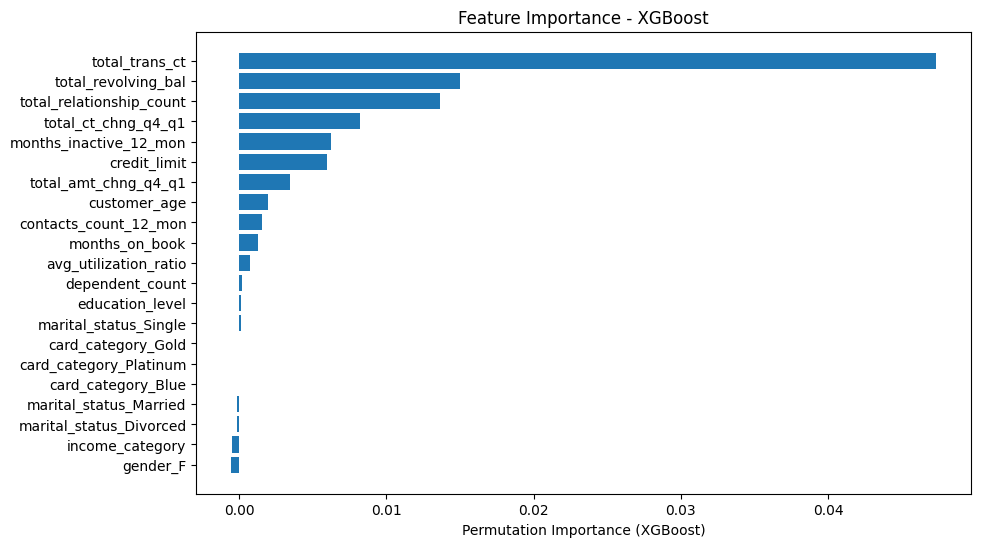

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(X_test.columns[sorted_idx_xgb], perm_importance_xgb.importances_mean[sorted_idx_xgb])
plt.xlabel("Permutation Importance (XGBoost)")
plt.title("Feature Importance - XGBoost")
plt.show()

In [ ]:
# SVM
perm_importance_svm = permutation_importance(best_svm_model, X_test_np, y_test, scoring='recall', n_repeats=10, random_state=42)
sorted_idx_svm = perm_importance_svm.importances_mean.argsort()

In [ ]:
feature_importance_svm = pd.DataFrame({
    'Feature': X_test.columns[sorted_idx_svm],
    'Importance': perm_importance_svm.importances_mean[sorted_idx_svm]
}).sort_values(by='Importance', ascending=False)
feature_importance_svm

,Feature,Importance
20,total_trans_ct,0.055478
19,total_relationship_count,0.029254
18,total_revolving_bal,0.018648
17,months_inactive_12_mon,0.010839
16,total_amt_chng_q4_q1,0.005478
15,customer_age,0.005012
14,marital_status_Single,0.003380
13,marital_status_Married,0.002797
12,marital_status_Divorced,0.001632
11,total_ct_chng_q4_q1,0.001049


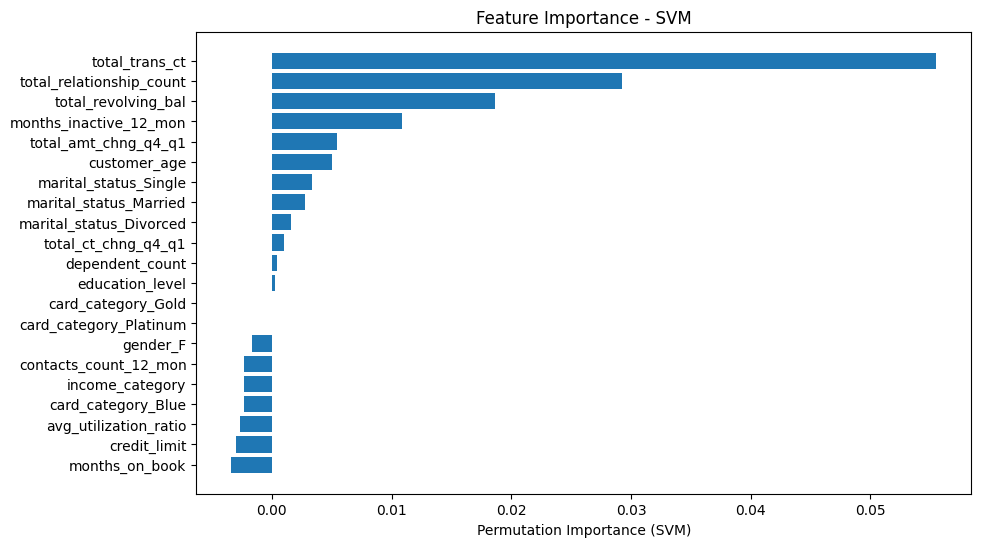

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(X_test.columns[sorted_idx_svm], perm_importance_svm.importances_mean[sorted_idx_svm])
plt.xlabel("Permutation Importance (SVM)")
plt.title("Feature Importance - SVM")
plt.show()

**Partial Dependence Plot (PDP)**<br>
Memahami hubungan antara suatu fitur dengan prediksi model, dengan cara melihat dampaknya ketika fitur tersebut bervariasi sementara fitur lainnya tetap.

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
# fitur yang akan dianalisis
features_to_plot = ['total_trans_ct', 'total_revolving_bal', 'total_relationship_count']

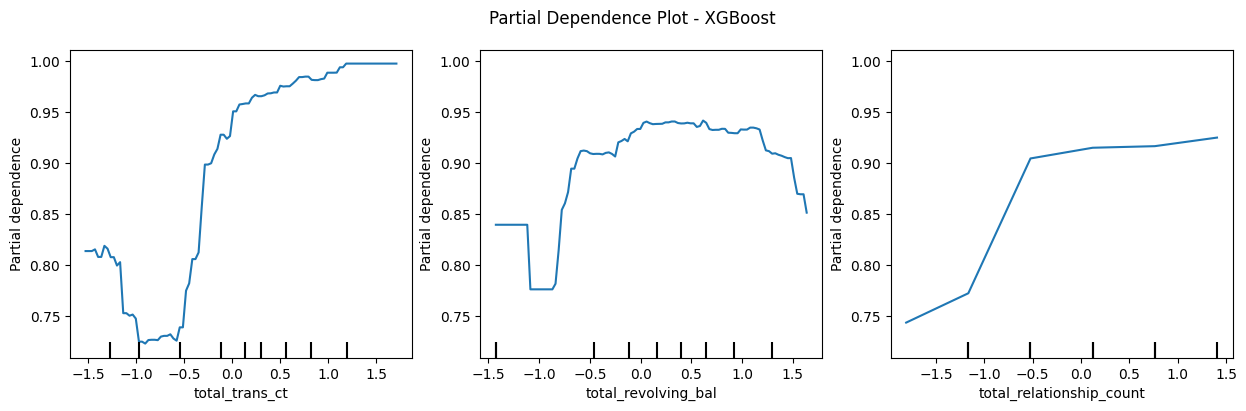

In [ ]:
# XGBoost
fig, ax = plt.subplots(nrows=1, ncols=len(features_to_plot), figsize=(15, 4))
PartialDependenceDisplay.from_estimator(best_xgb_model, X_test, features_to_plot, ax=ax)
fig.suptitle("Partial Dependence Plot - XGBoost")
plt.show()

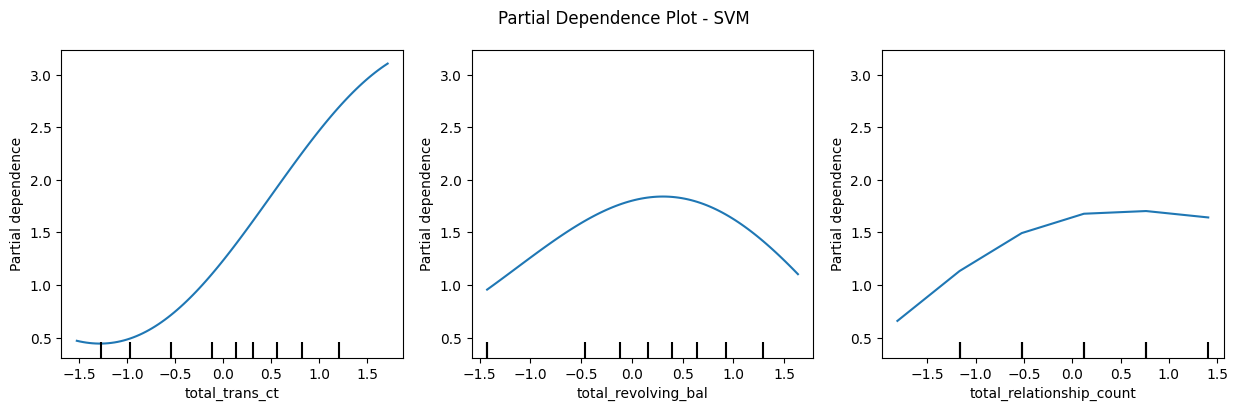

In [ ]:
# SVM
feature_indices = [feature_names.index(f) for f in features_to_plot]
fig, ax = plt.subplots(nrows=1, ncols=len(features_to_plot), figsize=(15, 4), squeeze=False)
display = PartialDependenceDisplay.from_estimator(best_svm_model, X_test_np, feature_indices, ax=ax.ravel())
fig.suptitle("Partial Dependence Plot - SVM")
for i, axi in enumerate(ax.ravel()):
    axi.set_xlabel(features_to_plot[i])
plt.show()

**SHAP (Shapley Additive Explanations)**<br>
Memberikan interpretasi kontribusi masing-masing fitur terhadap prediksi model.

In [ ]:
import shap

In [ ]:
## === SHAP untuk XGBoost ===
explainer_xgb = shap.TreeExplainer(best_xgb_model)
shap_values_xgb = explainer_xgb(X_test)

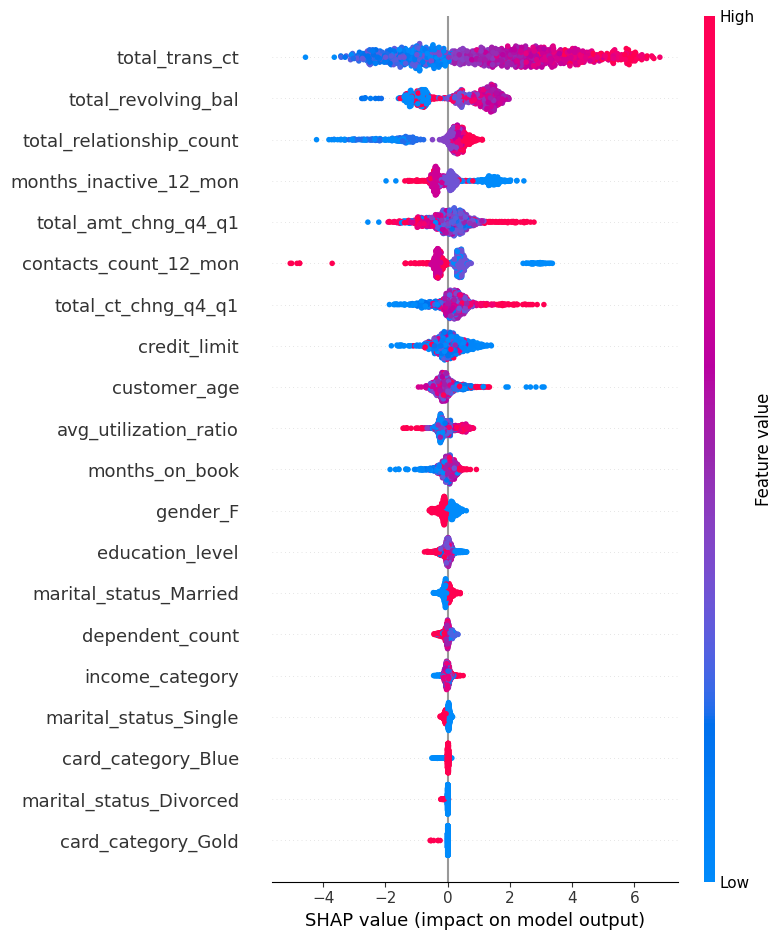

In [ ]:
# Summary Plot (Feature Importance)
shap.summary_plot(shap_values_xgb.values, X_test)

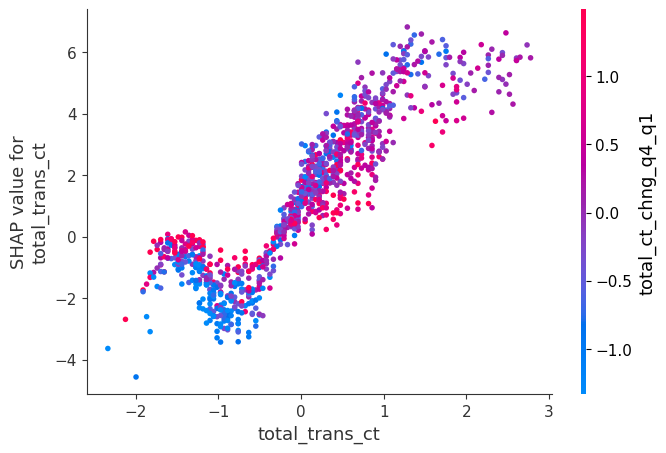

In [ ]:
# Dependence Plot
shap.dependence_plot('total_trans_ct', shap_values_xgb.values, X_test)

In [ ]:
# Force Plot (Prediksi Individual)
shap.initjs()
shap.force_plot(explainer_xgb.expected_value, shap_values_xgb.values[0, :], X_test.iloc[0, :])
#shap.force_plot(explainer_xgb.expected_value, shap_values_xgb.values[0, :], X_test.iloc[0, :], matplotlib=True)

In [ ]:
# === SHAP untuk SVM ===
X_sample = X_test_np[:100]
explainer_svm = shap.KernelExplainer(best_svm_model.predict, X_sample)
shap_values_svm = explainer_svm.shap_values(X_sample, nsamples=100)

  0%|          | 0/100 [00:00<?, ?it/s]

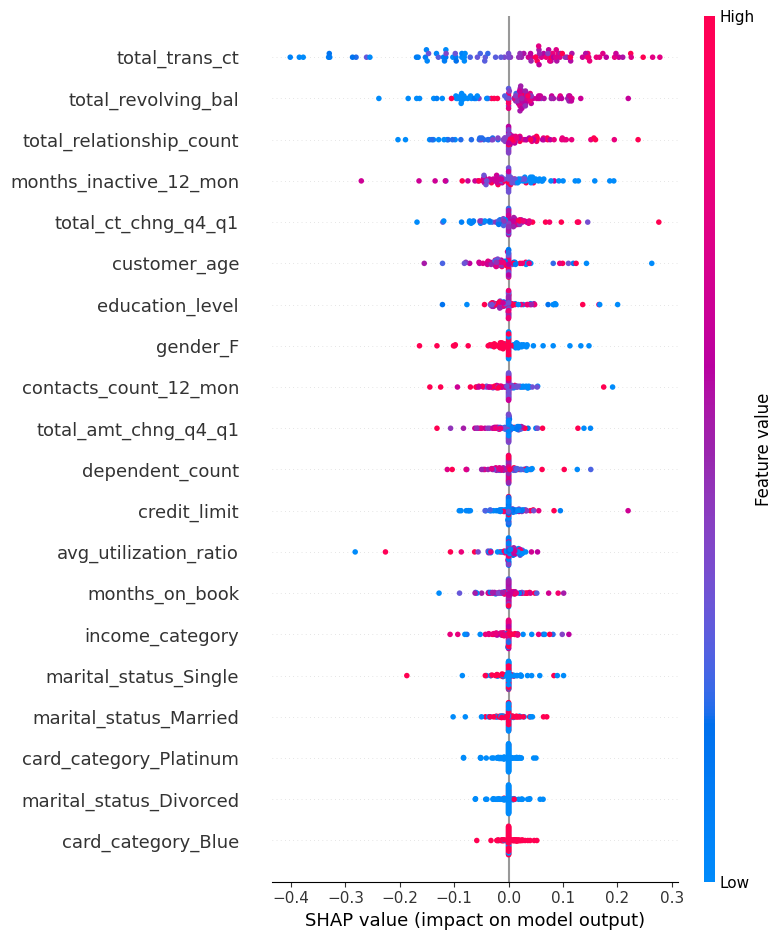

In [ ]:
# Summary Plot (Feature Importance)
shap.summary_plot(shap_values_svm, X_sample, feature_names=feature_names)


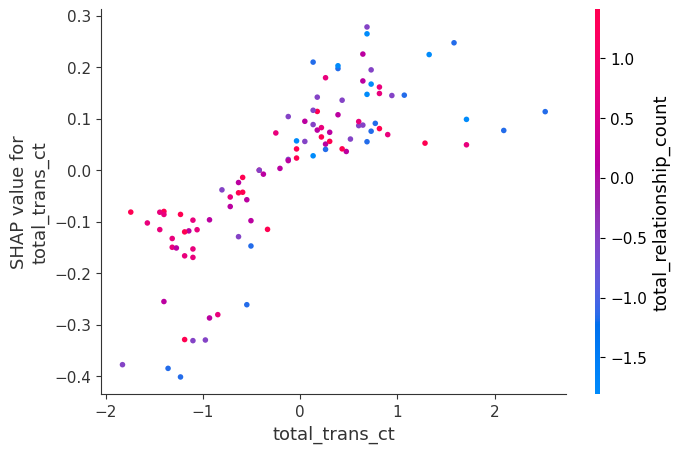

In [ ]:
# Dependence Plot
shap.dependence_plot('total_trans_ct', shap_values_svm, X_sample, feature_names=feature_names)

In [ ]:
shap.initjs()
shap.force_plot(explainer_svm.expected_value, shap_values_svm[0, :], X_sample[0, :], feature_names=feature_names)

## `EVALUATION INTERPRETATION`

### Perbandingan Confusion Matrix pada Data Test


|             | Predicted 0 | Predicted 1 |
|-------------|--------------|--------------|
| **Actual 0** | TN           | FP           |
| **Actual 1** | FN           | TP           |

| **Model**   | **Actual** | **Predicted 0** | **Predicted 1** |  
|------------|-----------|-----------------|-----------------|  
| **XGBoost** | **0**     | 101             | 54              |  
|            | **1**     | 7               | 851             |  
| **SVM**    | **0**     | 92              | 63              |  
|            | **1**     | 42              | 816             |  


Kedua model menunjukkan perbedaan dalam prediksi pada dataset uji :
- **XGBoost** memiliki TP = 851 dan FN = 7, menunjukkan kemampuannya dalam menangkap churn dengan sangat baik. Masih ada non-churn yang diklasifikasikan sebagai churn (FP = 54,  TN = 101).
- **SVM** dengan TP = 816 dan FN = 42, dengan FP = 63 dan TN = 92, yang menunjukkan keseimbangan yang lebih baik dalam prediksi churn dan non-churn dibandingkan XGBoost, tetapi dengan performa lebih rendah dalam mendeteksi churn dibandingkan XGBoost.

### Perbandingan Accuracy pada Data Test

| **Model**   | **Accuracy (Decimal)** | **Accuracy (%)** |  
|------------|------------------------|------------------|  
| **XGBoost** | 0.9398                 | 93.98%          |  
| **SVM**     | 0.8963                 | 89.63%          |  

**XGBoost** memiliki Accuracy = 93.98%, menunjukkan kemampuannya dalam prediksi klasifikasi dengan sangat baik. Pada model **SVM** memiliki Accuracy = 89.63%, yang menunjukkan performa yang cukup tinggi dalam prediksi pada dataset uji.

### Perbandingan Classification Report pada Data Test

| **Model**   | **Class** | **Precision** | **Recall** | **F1-Score** | **Support** |  
|------------|----------|--------------|-----------|-------------|------------|  
| **XGBoost** | 0        | 0.94         | 0.65      | 0.77        | 155        |  
|            | 1        | 0.94         | **0.99**  | 0.97        | 858        |  
|            | **Accuracy** |            |           | **0.94**    | 1013       |  
|            | **Macro Avg** | 0.94      | 0.82      | 0.87        | 1013       |  
|            | **Weighted Avg** | 0.94  | 0.94      | 0.94        | 1013       |  
| **SVM**     | 0        | 0.69         | 0.59      | 0.64        | 155        |  
|            | 1        | 0.93         | **0.95**  | 0.94        | 858        |  
|            | **Accuracy** |            |           | **0.90**    | 1013       |  
|            | **Macro Avg** | 0.81      | 0.77      | 0.79        | 1013       |  
|            | **Weighted Avg** | 0.89  | 0.90      | 0.89        | 1013       |  

- XGBoost dengan akurasi 94%, dan Recall kelas 1 sebesar 0.99 serta F1-score 0.97, menunjukkan kemampuannya dalam menangkap sebagian besar pelanggan yang churn. Untuk non-churn, XGBoost memiliki Precision sebesar 0.94 dan Recall 0.65.
- SVM memiliki akurasi 90%, dengan Recall kelas 1 sebesar 0.95 dan F1-score 0.94, menunjukkan performa yang tetap baik dalam mendeteksi churn. Sedangkan pada non-churn, SVM memiliki Precision sebesar 0.69 dan Recall 0.59.

### Perbandingan Cross-Validation Scores pada Data Test

| **Model**   | **CV Fold 1** | **CV Fold 2** | **CV Fold 3** | **CV Fold 4** | **CV Fold 5** | **Mean CV Score** |
|------------|-------------|-------------|-------------|-------------|-------------|-----------------|
| **XGBoost** | 0.9212     | 0.9212      | 0.9064      | 0.8911      | 0.8911      | **0.9062**      |
| **SVM**     | 0.8818     | 0.8719      | 0.8867      | 0.8663      | 0.9010      | **0.8815**      |

XGBoost memiliki mean CV score lebih tinggi (0.9062) dibandingkan SVM (0.8815), menunjukkan performa yang lebih baik secara keseluruhan. XGBoost memberikan skor yang lebih konsisten di setiap fold, dengan rentang nilai antara 0.8911 hingga 0.9212, mencerminkan kemampuannya dalam menangkap pola dengan lebih efektif dibandingkan SVM, yang memiliki rentang nilai antara 0.8663 hingga 0.9010.

Fokus utama adalah **Recall** untuk kelas 1 karena tujuan utamanya mendeteksi churn.

Kedua model memiliki performa yang baik dalam memprediksi churn dan non-churn, dengan accuracy yang Tinggi (93.98% dan 89.63%). Namun, XGBoost lebih unggul untuk analisis churn karena:
- Recall dan F1-score lebih tinggi pada churn (kelas 1): XGBoost memiliki Recall 0.99 dan F1-score 0.97, lebih baik dibandingkan SVM yang memiliki Recall 0.95 dan F1-score 0.94.
- Kinerja lebih stabil (Mean CV Score): XGBoost memiliki mean CV score sebesar 0.9062, lebih tinggi dibandingkan SVM yang memiliki 0.8815, menunjukkan konsistensi model dalam menangani data.

Karena **XGBoost** memiliki Recall lebih tinggi dalam mendeteksi churn serta performa yang lebih stabil, model ini lebih direkomendasikan untuk digunakan dalam analisis churn dibandingkan SVM.

### Explanatory Model Analysis (EMA)

| **Aspek**                  | **Observasi** |
|----------------------------|---------------|
| **Fitur Paling Berpengaruh** | - **Total jumlah transaksi (total_trans_ct)** → faktor utama yang menentukan churn di kedua model. <br> - **Total saldo bergulir (total_revolving_bal)** → juga berpengaruh besar. <br> - **Total hubungan dengan bank (total_relationship_count)** → semakin banyak hubungan, semakin kecil kemungkinan churn. |
| **Perbedaan XGBoost & SVM** | - **XGBoost** lebih fokus pada transaksi dan saldo. <br> - **SVM** juga menilai transaksi penting, tetapi lebih memperhatikan jumlah bulan tidak aktif (**months_inactive_12_mon**) dan perubahan jumlah transaksi (**total_amt_chng_q4_q1**). <br> - Meskipun ada sedikit perbedaan dalam bobot fitur, hasil utama tetap sama. |
| **Hubungan Fitur dengan Churn** | - Semakin tinggi **total_trans_ct**, semakin kecil kemungkinan churn. <br> - **Saldo rekening yang sering digunakan** bisa meningkatkan atau menurunkan churn, tergantung faktor lainnya. <br> - Faktor demografi seperti **kategori kartu pembayaran dan pendapatan** tidak terlalu berpengaruh. |
| **Kesimpulan** | - **Total transaksi pelanggan adalah indikator paling kuat dalam memprediksi churn.** <br> - **XGBoost lebih fokus pada pola transaksi, sedangkan SVM juga mempertimbangkan riwayat inaktivitas.** <br> - **Kedua model memiliki pola yang mirip, sehingga hasilnya tetap konsisten.** |


### Rekomendasi Bisnis

| **Rekomendasi Bisnis** | **Tindakan** |
|------------------------|-------------|
| **Dorong Peningkatan Frekuensi Transaksi** | - **Total_trans_ct** adalah indikator utama churn, semakin sering transaksi, semakin kecil risiko churn. <br> - **Solusi:** Bank dapat memberikan **cashback, diskon, atau reward loyalty** untuk meningkatkan jumlah transaksi pelanggan. |
| **Manajemen Saldo yang Efektif** | - Pelanggan dengan **total_revolving_bal tinggi** berisiko lebih besar untuk churn. <br> - **Solusi:** Berikan **program edukasi keuangan**, promosi suku bunga, atau penyesuaian limit kredit agar pelanggan tetap aktif menggunakan layanan bank. |
| **Aktifkan Kembali Pelanggan yang Pasif** | - **months_inactive_12_mon** memiliki dampak besar terhadap churn, pelanggan yang lama tidak aktif lebih mungkin berhenti. <br> - **Solusi:** Kirimkan **notifikasi, promo eksklusif, atau layanan konsultasi keuangan** bagi pelanggan yang jarang melakukan transaksi. |
| **Perkuat Hubungan dengan Pelanggan yang Sudah Aktif** | - **total_relationship_count** menunjukkan bahwa semakin banyak produk yang digunakan, semakin kecil risiko churn. <br> - **Solusi:** Terapkan strategi **cross-selling** (misalnya menawarkan kartu kredit bagi pengguna rekening tabungan) atau **bundling produk** untuk meningkatkan loyalitas pelanggan. |
| **Optimalkan Strategi Berdasarkan Wawasan Demografi** | - Faktor demografi seperti **kategori kartu dan pendapatan** tidak berpengaruh besar. <br> - **Solusi:** Alihkan fokus strategi retensi ke **pola transaksi dan keterlibatan pelanggan** daripada hanya mengandalkan faktor demografi. |
